In [ ]:
!pip install missingpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 KB 439.1 kB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error

import sys
import sklearn.neighbors._base
sys.modules['sklearn.neighbors.base'] = sklearn.neighbors._base

#Imputers
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer
from sklearn.impute import SimpleImputer
from missingpy import MissForest

pd.set_option('display.max_columns', 200)

In [ ]:
df = pd.read_csv(r'diet.csv')
df

SEQN         WTDRD1         WTDR2D  DR1DRSTZ  DR1EXMER  DRABF  DRDINT  \
0     73557   16888.327864   12930.890649         1      49.0    2.0     2.0   
1     73558   17932.143865   12684.148869         1      59.0    2.0     2.0   
2     73559   59641.812930   39394.236709         1      49.0    2.0     2.0   
3     73560  142203.069917  125966.366442         1      54.0    2.0     2.0   
4     73561   59052.357033   39004.892993         1      63.0    2.0     2.0   
...     ...            ...            ...       ...       ...    ...     ...   
9808  83727   14146.781331   10520.302070         1      59.0    2.0     2.0   
9809  83728   38750.761193   51815.103262         1      25.0    2.0     2.0   
9810  83729   15272.505199   10401.781170         1      59.0    2.0     2.0   
9811  83730       0.000000            NaN         5       NaN    NaN     NaN   
9812  83731    5805.674812    4339.132077         1      49.0    2.0     2.0   

      DR1DBIH  DR1DAY  DR1LANG  DR1MNRSP  DR1HELPD  DBQ095Z  DBD100  DRQSPREP  \
0         6.0     2.0      1.0       1.0      13.0      3.0     2.0       4.0   
1         4.0     1.0      1.0       1.0      13.0      1.0     2.0       3.0   
2        18.0     6.0      1.0       1.0      13.0      1.0     1.0       2.0   
3        21.0     3.0      1.0       1.0      12.0      1.0     1.0       3.0   
4        18.0     1.0      1.0       1.0      13.0      4.0     NaN       4.0   
...       ...     ...      ...       ...       ...      ...     ...       ...   
9808      8.0     7.0      1.0       1.0      13.0      1.0     1.0       3.0   
9809      9.0     5.0      1.0       2.0       3.0      4.0     NaN       3.0   
9810      1.0     6.0      1.0       1.0      13.0      4.0     NaN       3.0   
9811      NaN     NaN      NaN       NaN       NaN      NaN     NaN       NaN   
9812     12.0     6.0      1.0       1.0       2.0      4.0     NaN       4.0   

      DR1STY  DR1SKY  DRQSDIET  DRQSDT1  DRQSDT2  DRQSDT3  DRQSDT4  DRQSDT5  \
0        2.0     NaN       2.0      NaN      NaN      NaN      NaN      NaN   
1        1.0     1.0       2.0      NaN      NaN      NaN      NaN      NaN   
2        2.0     NaN       1.0      NaN      NaN      NaN      NaN      NaN   
3        2.0     NaN       2.0      NaN      NaN      NaN      NaN      NaN   
4        2.0     NaN       1.0      NaN      NaN      NaN      NaN      NaN   
...      ...     ...       ...      ...      ...      ...      ...      ...   
9808     2.0     NaN       2.0      NaN      NaN      NaN      NaN      NaN   
9809     2.0     NaN       2.0      NaN      NaN      NaN      NaN      NaN   
9810     2.0     NaN       1.0      1.0      NaN      NaN      NaN      NaN   
9811     NaN     NaN       NaN      NaN      NaN      NaN      NaN      NaN   
9812     2.0     NaN       2.0      NaN      NaN      NaN      NaN      NaN   

      DRQSDT6  DRQSDT7  DRQSDT8  DRQSDT9  DRQSDT10  DRQSDT11  DRQSDT12  \
0         NaN      NaN      NaN      NaN       NaN       NaN       NaN   
1         NaN      NaN      NaN      NaN       NaN       NaN       NaN   
2         NaN      7.0      NaN      NaN       NaN       NaN       NaN   
3         NaN      NaN      NaN      NaN       NaN       NaN       NaN   
4         NaN      NaN      NaN      NaN       NaN       NaN       NaN   
...       ...      ...      ...      ...       ...       ...       ...   
9808      NaN      NaN      NaN      NaN       NaN       NaN       NaN   
9809      NaN      NaN      NaN      NaN       NaN       NaN       NaN   
9810      NaN      NaN      NaN      NaN       NaN       NaN       NaN   
9811      NaN      NaN      NaN      NaN       NaN       NaN       NaN   
9812      NaN      NaN      NaN      NaN       NaN       NaN       NaN   

      DRQSDT91  DR1TNUMF  DR1TKCAL  DR1TPROT  DR1TCARB  DR1TSUGR  DR1TFIBE  \
0          NaN      11.0    1574.0     43.63    239.59    176.47      10.8   
1          NaN       8.0    5062.0    338.13    423.78     44.99      16.7   
2

# Data Preprocessing

## Missing Values Analysis

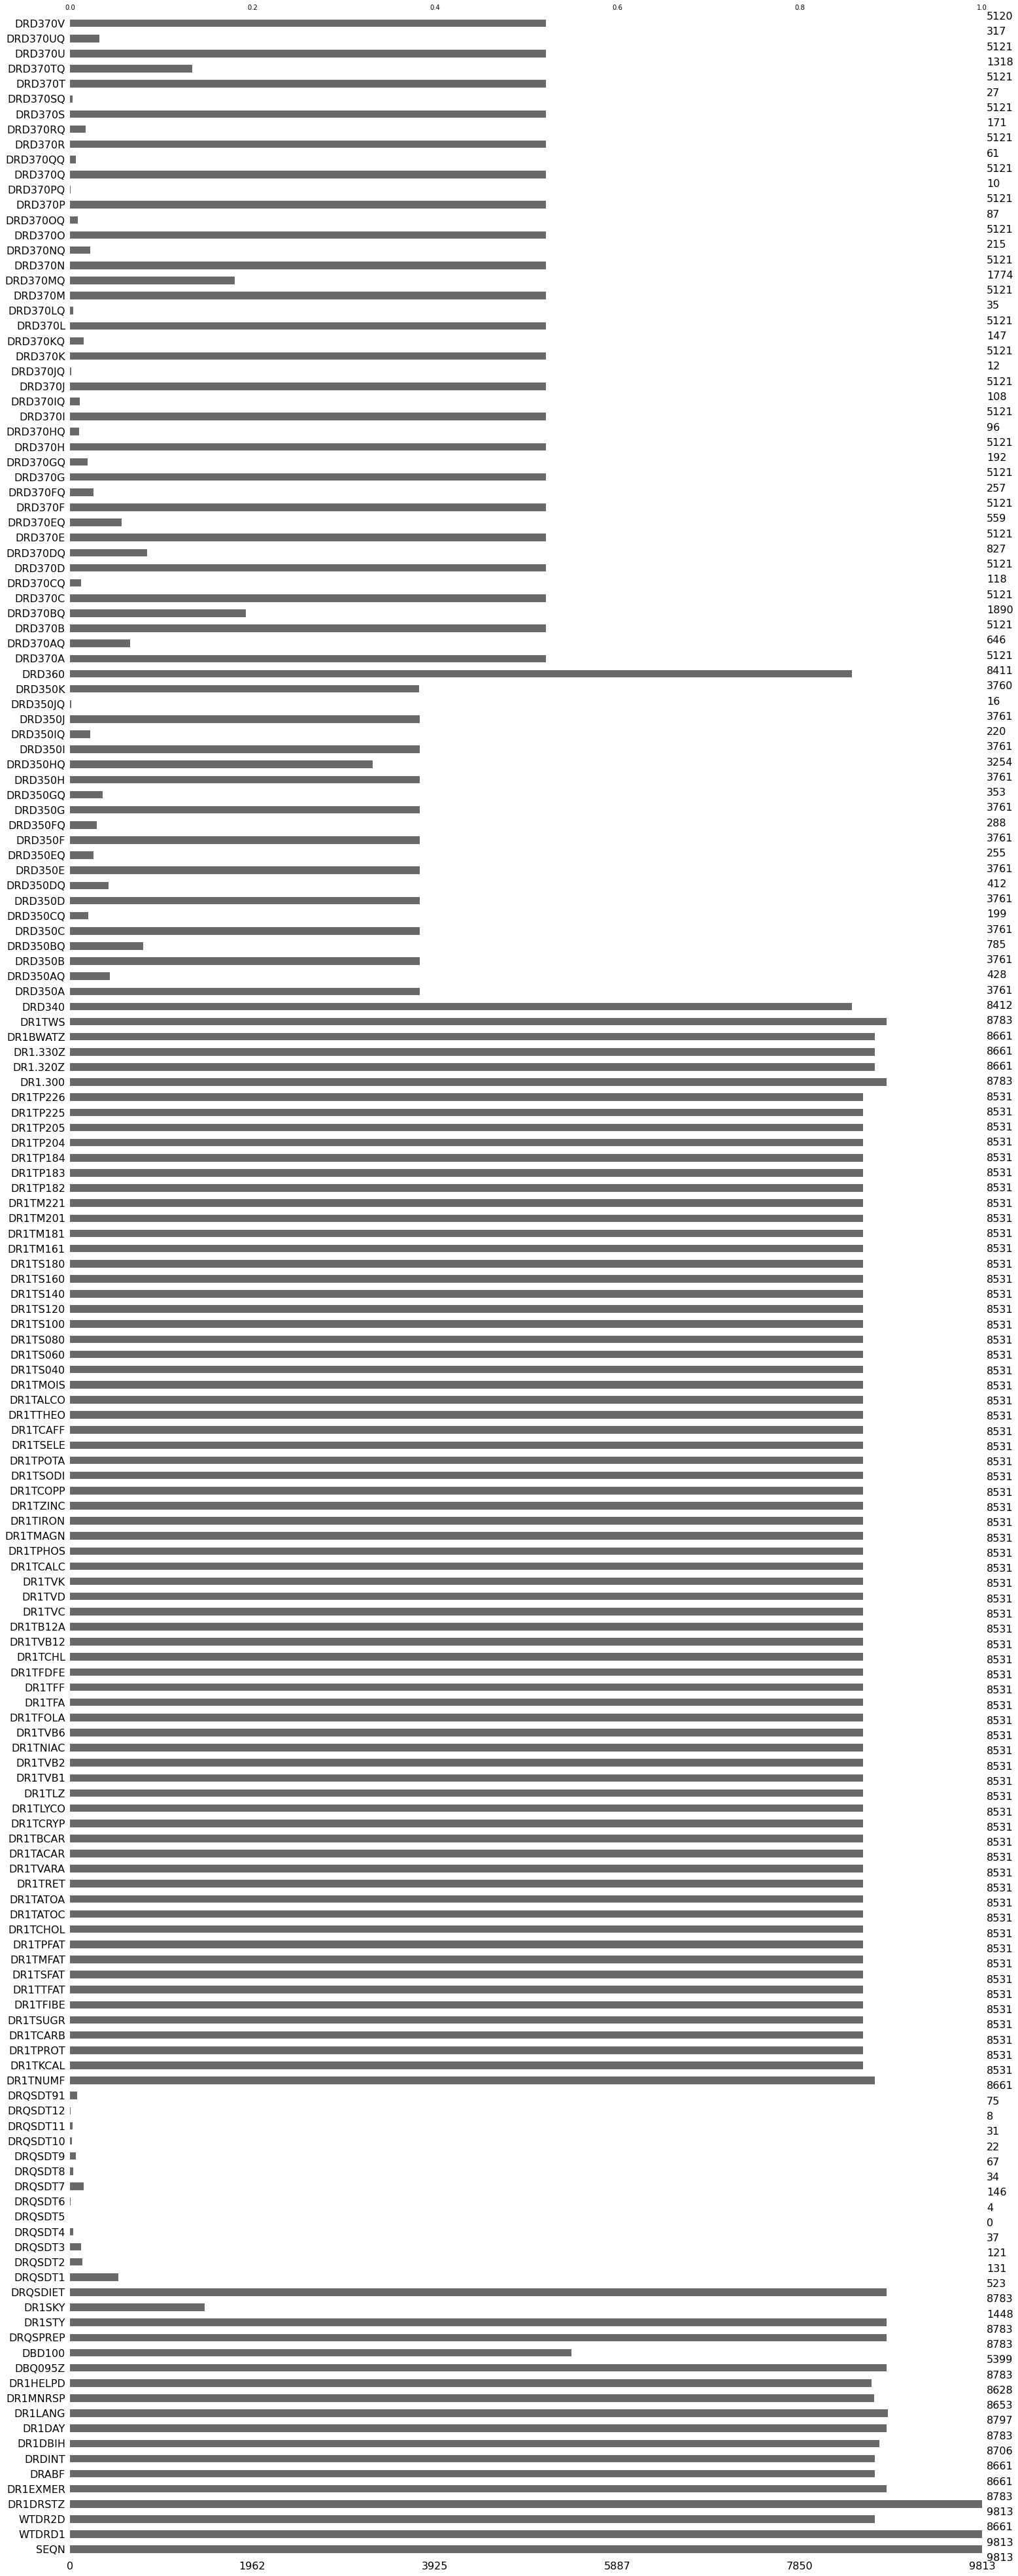

In [ ]:
msno.bar(df)

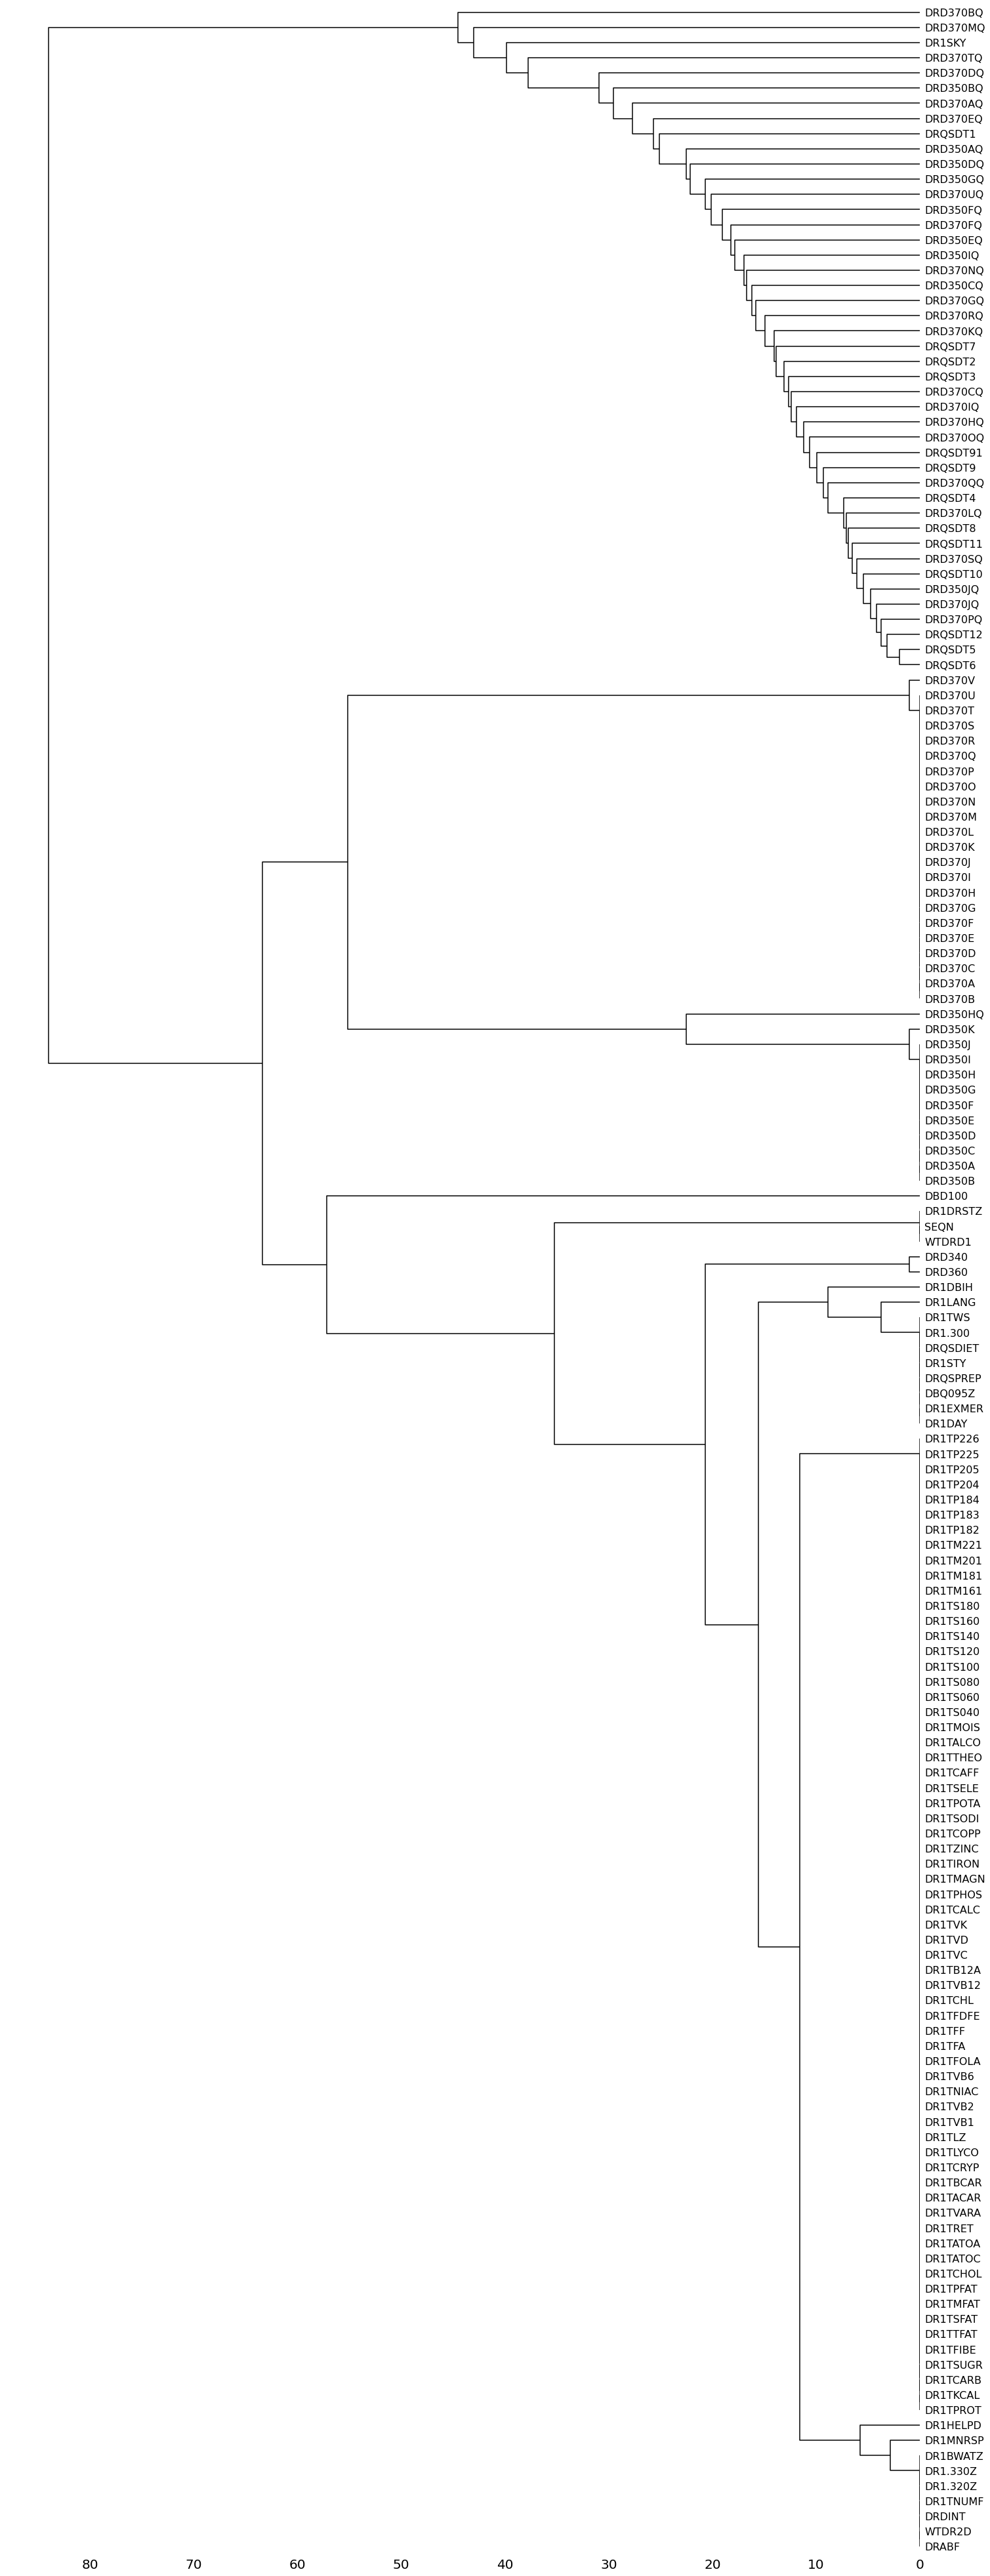

In [ ]:
msno.dendrogram(df)

In [ ]:
df.isnull().sum().sort_values(ascending=False)

DRQSDT5     9813
DRQSDT6     9809
DRQSDT12    9805
DRD370PQ    9803
DRD370JQ    9801
            ... 
DR1TWS      1030
DR1LANG     1016
WTDRD1         0
DR1DRSTZ       0
SEQN           0
Length: 168, dtype: int64

In [ ]:
df.shape

(9813, 168)

It seems like we have large number of missing values. In particular, some of the columns have either all or almost all missing values.

## Drop Columns with >90% NA

Let's drop the columns with >90% null values. This threshold was randomly determined.

In [ ]:
df.shape[0] * 0.9

8831.7

In [ ]:
drop_columns = df.isnull().sum().sort_values(ascending=False)[df.isnull().sum().sort_values(ascending=False) > 8832]
print(f"Number of columns with > 90% NA: {len(drop_columns)}")
print(drop_columns)

Number of columns with > 90% NA: 40
DRQSDT5     9813
DRQSDT6     9809
DRQSDT12    9805
DRD370PQ    9803
DRD370JQ    9801
DRD350JQ    9797
DRQSDT10    9791
DRD370SQ    9786
DRQSDT11    9782
DRQSDT8     9779
DRD370LQ    9778
DRQSDT4     9776
DRD370QQ    9752
DRQSDT9     9746
DRQSDT91    9738
DRD370OQ    9726
DRD370HQ    9717
DRD370IQ    9705
DRD370CQ    9695
DRQSDT3     9692
DRQSDT2     9682
DRQSDT7     9667
DRD370KQ    9666
DRD370RQ    9642
DRD370GQ    9621
DRD350CQ    9614
DRD370NQ    9598
DRD350IQ    9593
DRD350EQ    9558
DRD370FQ    9556
DRD350FQ    9525
DRD370UQ    9496
DRD350GQ    9460
DRD350DQ    9401
DRD350AQ    9385
DRQSDT1     9290
DRD370EQ    9254
DRD370AQ    9167
DRD350BQ    9028
DRD370DQ    8986
dtype: int64


### Last check for distribution of dropped columns

Let's double check the distribution of the columns we are going to drop.

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2657: RuntimeWarning: Mean of empty slice.
  line, = ax.plot(a.mean(), 0)
/usr/local/lib/python3.8/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.8/dist-packages/numpy/lib/histograms.py:906: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


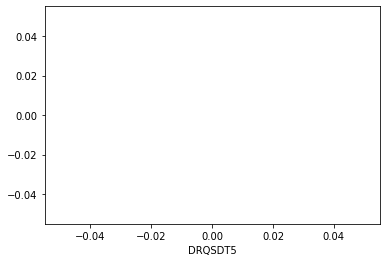

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


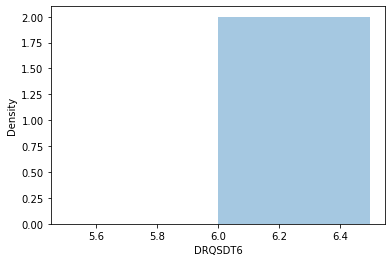

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


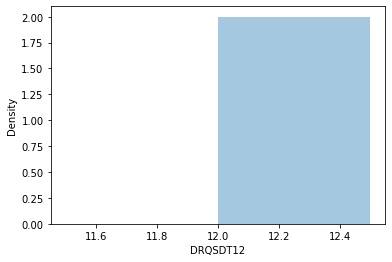

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


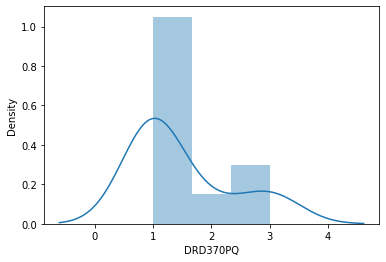

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


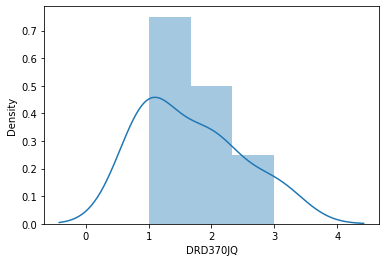

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


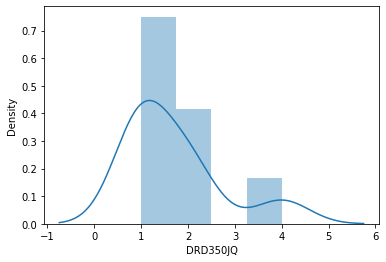

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


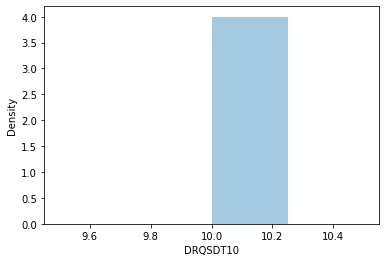

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


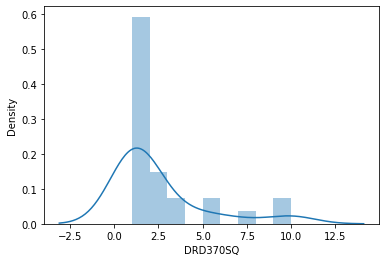

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


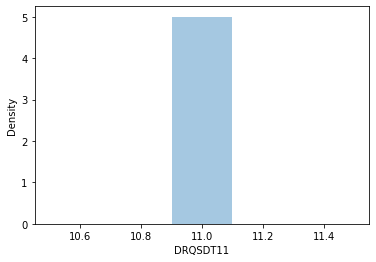

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


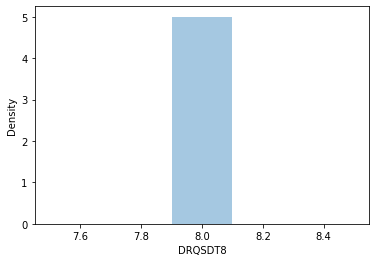

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


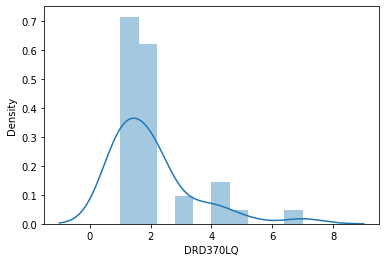

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


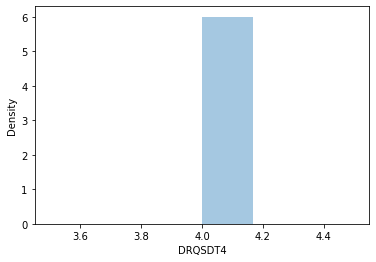

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


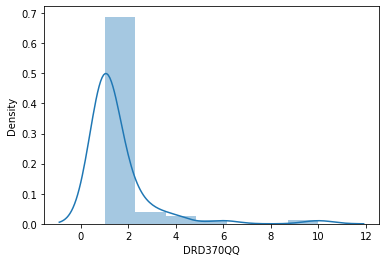

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


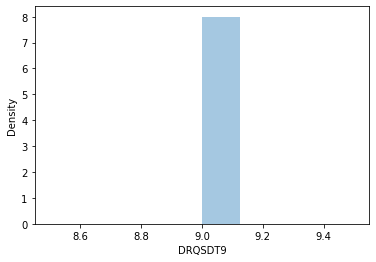

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


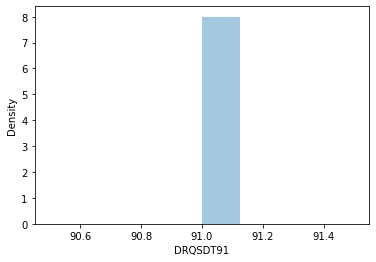

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


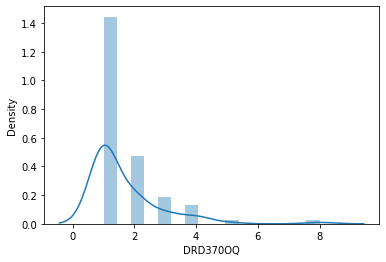

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


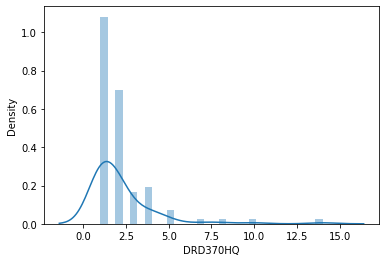

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


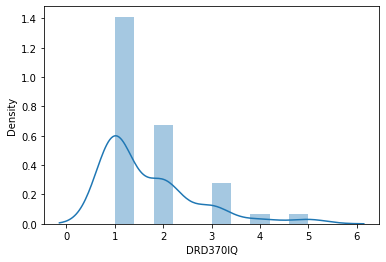

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


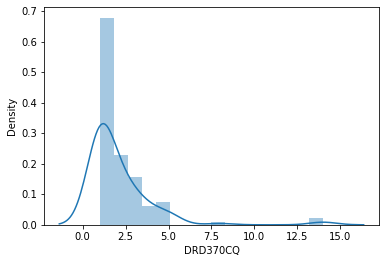

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


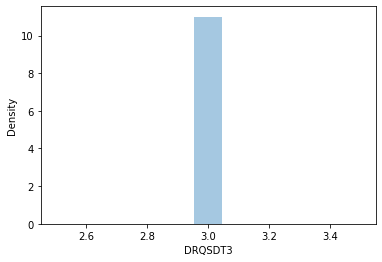

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


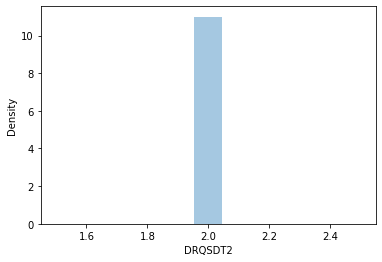

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


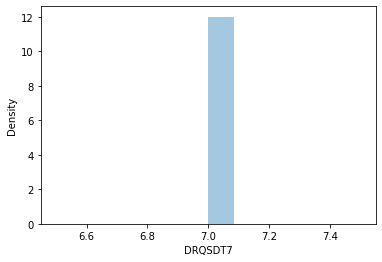

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


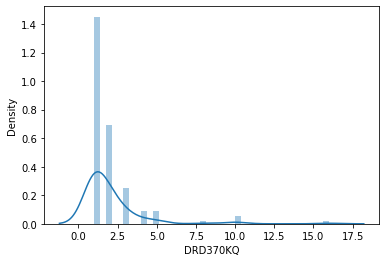

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


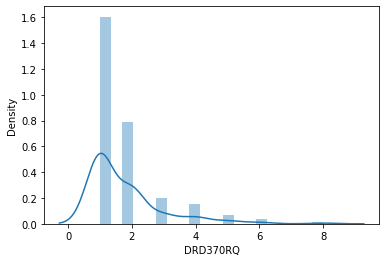

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


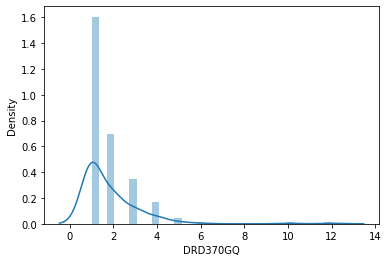

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


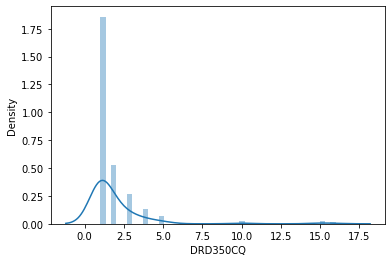

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


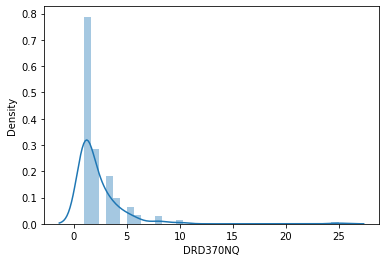

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


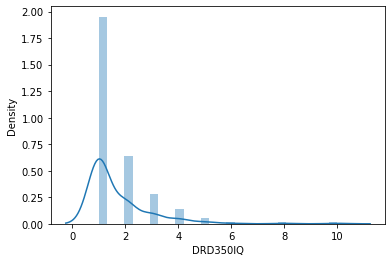

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


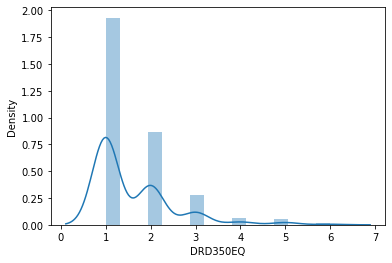

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


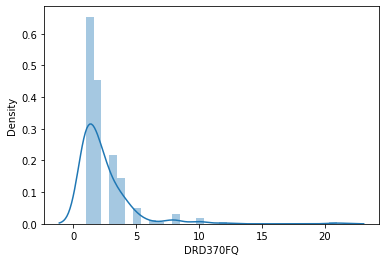

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


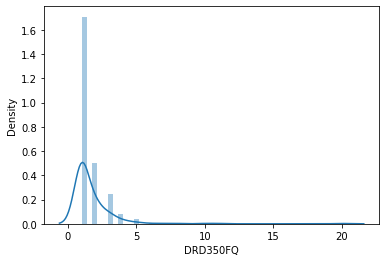

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


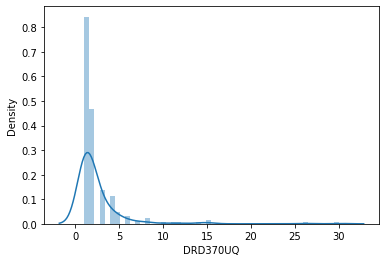

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


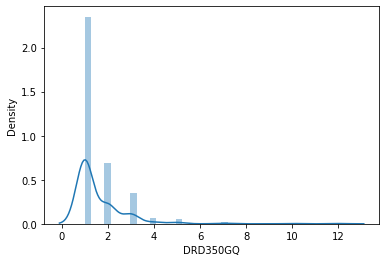

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


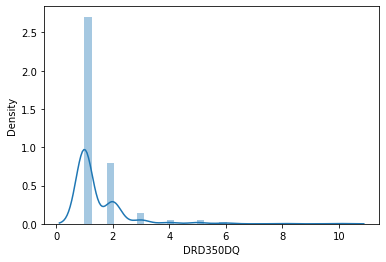

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


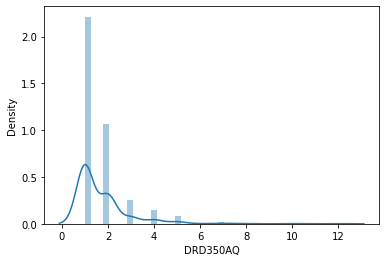

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


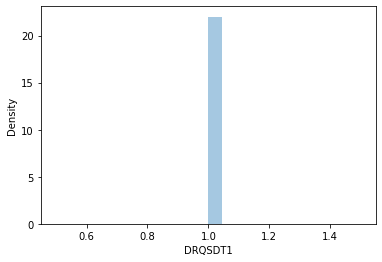

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


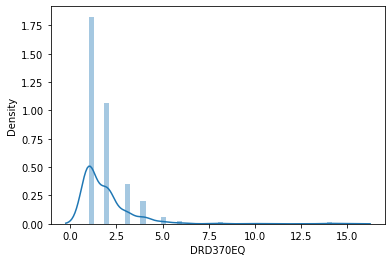

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


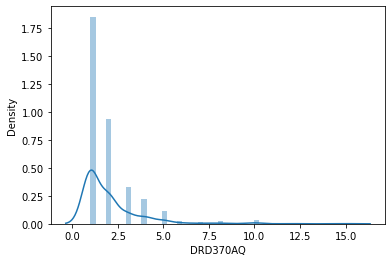

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


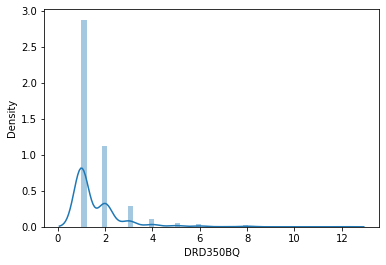

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


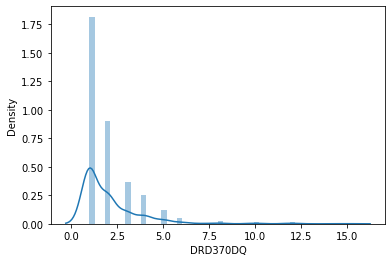

In [ ]:
for i in drop_columns.index:
  sns.distplot(df[i], kde = True)
  plt.show()

In [ ]:
df.drop(drop_columns.index, axis=1, inplace = True)
df

SEQN         WTDRD1         WTDR2D  DR1DRSTZ  DR1EXMER  DRABF  DRDINT  \
0     73557   16888.327864   12930.890649         1      49.0    2.0     2.0   
1     73558   17932.143865   12684.148869         1      59.0    2.0     2.0   
2     73559   59641.812930   39394.236709         1      49.0    2.0     2.0   
3     73560  142203.069917  125966.366442         1      54.0    2.0     2.0   
4     73561   59052.357033   39004.892993         1      63.0    2.0     2.0   
...     ...            ...            ...       ...       ...    ...     ...   
9808  83727   14146.781331   10520.302070         1      59.0    2.0     2.0   
9809  83728   38750.761193   51815.103262         1      25.0    2.0     2.0   
9810  83729   15272.505199   10401.781170         1      59.0    2.0     2.0   
9811  83730       0.000000            NaN         5       NaN    NaN     NaN   
9812  83731    5805.674812    4339.132077         1      49.0    2.0     2.0   

      DR1DBIH  DR1DAY  DR1LANG  DR1MNRSP  DR1HELPD  DBQ095Z  DBD100  DRQSPREP  \
0         6.0     2.0      1.0       1.0      13.0      3.0     2.0       4.0   
1         4.0     1.0      1.0       1.0      13.0      1.0     2.0       3.0   
2        18.0     6.0      1.0       1.0      13.0      1.0     1.0       2.0   
3        21.0     3.0      1.0       1.0      12.0      1.0     1.0       3.0   
4        18.0     1.0      1.0       1.0      13.0      4.0     NaN       4.0   
...       ...     ...      ...       ...       ...      ...     ...       ...   
9808      8.0     7.0      1.0       1.0      13.0      1.0     1.0       3.0   
9809      9.0     5.0      1.0       2.0       3.0      4.0     NaN       3.0   
9810      1.0     6.0      1.0       1.0      13.0      4.0     NaN       3.0   
9811      NaN     NaN      NaN       NaN       NaN      NaN     NaN       NaN   
9812     12.0     6.0      1.0       1.0       2.0      4.0     NaN       4.0   

      DR1STY  DR1SKY  DRQSDIET  DR1TNUMF  DR1TKCAL  DR1TPROT  DR1TCARB  \
0        2.0     NaN       2.0      11.0    1574.0     43.63    239.59   
1        1.0     1.0       2.0       8.0    5062.0    338.13    423.78   
2        2.0     NaN       1.0      27.0    1743.0     64.61    224.39   
3        2.0     NaN       2.0      19.0    1490.0     77.75    162.92   
4        2.0     NaN       1.0       7.0    1421.0     55.24    178.20   
...      ...     ...       ...       ...       ...       ...       ...   
9808     2.0     NaN       2.0      24.0    4687.0    223.32    494.54   
9809     2.0     NaN       2.0      19.0    1253.0     47.55    149.20   
9810     2.0     NaN       1.0      31.0    2475.0     89.37    290.37   
9811     NaN     NaN       NaN       NaN       NaN       NaN       NaN   
9812     2.0     NaN       2.0      27.0    2877.0     96.06    461.53   

      DR1TSUGR  DR1TFIBE  DR1TTFAT  DR1TSFAT  DR1TMFAT  DR1TPFAT  DR1TCHOL  \
0       176.47      10.8     52.81    17.819    18.493     8.829     209.0   
1        44.99      16.7    124.29    53.408    35.481    20.505    2584.0   
2       102.90       9.9     65.97    25.263    20.902    12.953      88.0   
3        80.58      10.6     58.27    23.511    16.986     9.617     187.0   
4        87.78      12.3     55.36     4.479    26.216     1.263      41.0   
...        ...       ...       ...       ...       ...       ...       ...   
9808    160.63      30.4    193.51    80.414    57.943    30.600     794.0   
9809     50.73       9.3     52.39    24.459    15.965     5.387     165.0   
9810    126.54      25.7    110.30    29.372    33.540    37.623     171.0   
9811       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
9812    221.21      36.3     78.63    24.838    24.252    23.867      92.0   

      DR1TATOC  DR1TATOA  DR1TRET  DR1TVARA  DR1TACAR  DR1TBCAR  DR1TCRYP  \
0         3.92      0.00     70.0     110.0      60.0     304.0     278.0   
1        20.94      0.00   1477.0    1488.0       0.0     145.0      12.0   
2         8.87  

## Drop Rows with >95% NA

The data may be collected incorrectly for these rows.

In [ ]:
df.isna()

SEQN  WTDRD1  WTDR2D  DR1DRSTZ  DR1EXMER  DRABF  DRDINT  DR1DBIH  \
0     False   False   False     False     False  False   False    False   
1     False   False   False     False     False  False   False    False   
2     False   False   False     False     False  False   False    False   
3     False   False   False     False     False  False   False    False   
4     False   False   False     False     False  False   False    False   
...     ...     ...     ...       ...       ...    ...     ...      ...   
9808  False   False   False     False     False  False   False    False   
9809  False   False   False     False     False  False   False    False   
9810  False   False   False     False     False  False   False    False   
9811  False   False    True     False      True   True    True     True   
9812  False   False   False     False     False  False   False    False   

      DR1DAY  DR1LANG  DR1MNRSP  DR1HELPD  DBQ095Z  DBD100  DRQSPREP  DR1STY  \
0      False    False     False     False    False   False     False   False   
1      False    False     False     False    False   False     False   False   
2      False    False     False     False    False   False     False   False   
3      False    False     False     False    False   False     False   False   
4      False    False     False     False    False    True     False   False   
...      ...      ...       ...       ...      ...     ...       ...     ...   
9808   False    False     False     False    False   False     False   False   
9809   False    False     False     False    False    True     False   False   
9810   False    False     False     False    False    True     False   False   
9811    True     True      True      True     True    True      True    True   
9812   False    False     False     False    False    True     False   False   

      DR1SKY  DRQSDIET  DR1TNUMF  DR1TKCAL  DR1TPROT  DR1TCARB  DR1TSUGR  \
0       True     False     False     False     False     False     False   
1      False     False     False     False     False     False     False   
2       True     False     False     False     False     False     False   
3       True     False     False     False     False     False     False   
4       True     False     False     False     False     False     False   
...      ...       ...       ...       ...       ...       ...       ...   
9808    True     False     False     False     False     False     False   
9809    True     False     False     False     False     False     False   
9810    True     False     False     False     False     False     False   
9811    True      True      True      True      True      True      True   
9812    True     False     False     False     False     False     False   

      DR1TFIBE  DR1TTFAT  DR1TSFAT  DR1TMFAT  DR1TPFAT  DR1TCHOL  DR1TATOC  \
0        False     False     False     False     False     False     False   
1        False     False     False     False     False     False     False   
2        False     False     False     False     False     False     False   
3        False     False     False     False     False     False     False   
4        False     False     False     False     False     False     False   
...        ...       ...       ...       ...       ...       ...       ...   
9808     False     False     False     False     False     False     False   
9809     False     False     False     False     False     False     False   
9810     False     False     False     False     False     False     False   
9811      True      True      True      True      True      True      True   
9812     False     False     False     False     False     False     False   

      DR1TATOA  DR1TRET  DR1TVARA  DR1TACAR  DR1TBCAR  DR1TCRYP  DR1TLYCO  \
0        False    False     False     False     False     False     False   
1        False    False     False     False     False     False     False   
2        False    False     False     False     False     False 

In [ ]:
num_of_features = len(df.columns)
rows_to_drop = df.isna().sum(numeric_only=True, axis=1)[df.isna().sum(numeric_only=True, axis=1) > 0.95 * num_of_features]
print(f"{len(rows_to_drop)} rows out of {df.shape[0]} rows are dropped because more than {0.95 * num_of_features} features  out of {num_of_features} were missing")
print(rows_to_drop)

1027 rows out of 9813 rows are dropped because more than 121.6 features  out of 128 were missing
14      125
23      125
43      125
69      125
85      125
       ... 
9800    125
9801    125
9806    125
9807    125
9811    125
Length: 1027, dtype: int64


In [ ]:
df.drop(index=rows_to_drop.index, inplace=True, axis =0)
df.reset_index(drop=True, inplace=True)
df

SEQN         WTDRD1         WTDR2D  DR1DRSTZ  DR1EXMER  DRABF  DRDINT  \
0     73557   16888.327864   12930.890649         1      49.0    2.0     2.0   
1     73558   17932.143865   12684.148869         1      59.0    2.0     2.0   
2     73559   59641.812930   39394.236709         1      49.0    2.0     2.0   
3     73560  142203.069917  125966.366442         1      54.0    2.0     2.0   
4     73561   59052.357033   39004.892993         1      63.0    2.0     2.0   
...     ...            ...            ...       ...       ...    ...     ...   
8781  83724   32115.849467   46169.498764         1      54.0    2.0     2.0   
8782  83727   14146.781331   10520.302070         1      59.0    2.0     2.0   
8783  83728   38750.761193   51815.103262         1      25.0    2.0     2.0   
8784  83729   15272.505199   10401.781170         1      59.0    2.0     2.0   
8785  83731    5805.674812    4339.132077         1      49.0    2.0     2.0   

      DR1DBIH  DR1DAY  DR1LANG  DR1MNRSP  DR1HELPD  DBQ095Z  DBD100  DRQSPREP  \
0         6.0     2.0      1.0       1.0      13.0      3.0     2.0       4.0   
1         4.0     1.0      1.0       1.0      13.0      1.0     2.0       3.0   
2        18.0     6.0      1.0       1.0      13.0      1.0     1.0       2.0   
3        21.0     3.0      1.0       1.0      12.0      1.0     1.0       3.0   
4        18.0     1.0      1.0       1.0      13.0      4.0     NaN       4.0   
...       ...     ...      ...       ...       ...      ...     ...       ...   
8781     10.0     3.0      1.0       1.0      13.0      4.0     NaN       1.0   
8782      8.0     7.0      1.0       1.0      13.0      1.0     1.0       3.0   
8783      9.0     5.0      1.0       2.0       3.0      4.0     NaN       3.0   
8784      1.0     6.0      1.0       1.0      13.0      4.0     NaN       3.0   
8785     12.0     6.0      1.0       1.0       2.0      4.0     NaN       4.0   

      DR1STY  DR1SKY  DRQSDIET  DR1TNUMF  DR1TKCAL  DR1TPROT  DR1TCARB  \
0        2.0     NaN       2.0      11.0    1574.0     43.63    239.59   
1        1.0     1.0       2.0       8.0    5062.0    338.13    423.78   
2        2.0     NaN       1.0      27.0    1743.0     64.61    224.39   
3        2.0     NaN       2.0      19.0    1490.0     77.75    162.92   
4        2.0     NaN       1.0       7.0    1421.0     55.24    178.20   
...      ...     ...       ...       ...       ...       ...       ...   
8781     2.0     NaN       2.0      24.0    2432.0     77.09    384.72   
8782     2.0     NaN       2.0      24.0    4687.0    223.32    494.54   
8783     2.0     NaN       2.0      19.0    1253.0     47.55    149.20   
8784     2.0     NaN       1.0      31.0    2475.0     89.37    290.37   
8785     2.0     NaN       2.0      27.0    2877.0     96.06    461.53   

      DR1TSUGR  DR1TFIBE  DR1TTFAT  DR1TSFAT  DR1TMFAT  DR1TPFAT  DR1TCHOL  \
0       176.47      10.8     52.81    17.819    18.493     8.829     209.0   
1        44.99      16.7    124.29    53.408    35.481    20.505    2584.0   
2       102.90       9.9     65.97    25.263    20.902    12.953      88.0   
3        80.58      10.6     58.27    23.511    16.986     9.617     187.0   
4        87.78      12.3     55.36     4.479    26.216     1.263      41.0   
...        ...       ...       ...       ...       ...       ...       ...   
8781    164.56      22.2     69.26    24.006    20.991    18.247     143.0   
8782    160.63      30.4    193.51    80.414    57.943    30.600     794.0   
8783     50.73       9.3     52.39    24.459    15.965     5.387     165.0   
8784    126.54      25.7    110.30    29.372    33.540    37.623     171.0   
8785    221.21      36.3     78.63    24.838    24.252    23.867      92.0   

      DR1TATOC  DR1TATOA  DR1TRET  DR1TVARA  DR1TACAR  DR1TBCAR  DR1TCRYP  \
0         3.92      0.00     70.0     110.0      60.0     304.0     278.0   
1        20.94      0.00   1477.0    1488.0       0.0     145.0      12.0   
2         8.87  

## Test Imputation Methods

In [ ]:
mode_imputer = SimpleImputer(strategy='most_frequent')
mode_df = pd.DataFrame()
for i in df.columns:
  if df[i].isna().sum() == 0:
    mode_df[i] = df[i]
    continue
  mode_df[i] = mode_imputer.fit_transform(df[[i]]).ravel()

mode_df

<ipython-input-17-c1d4d2ad61f1>:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  mode_df[i] = mode_imputer.fit_transform(df[[i]]).ravel()
<ipython-input-17-c1d4d2ad61f1>:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  mode_df[i] = mode_imputer.fit_transform(df[[i]]).ravel()
<ipython-input-17-c1d4d2ad61f1>:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To 

SEQN         WTDRD1         WTDR2D  DR1DRSTZ  DR1EXMER  DRABF  DRDINT  \
0     73557   16888.327864   12930.890649         1      49.0    2.0     2.0   
1     73558   17932.143865   12684.148869         1      59.0    2.0     2.0   
2     73559   59641.812930   39394.236709         1      49.0    2.0     2.0   
3     73560  142203.069917  125966.366442         1      54.0    2.0     2.0   
4     73561   59052.357033   39004.892993         1      63.0    2.0     2.0   
...     ...            ...            ...       ...       ...    ...     ...   
8781  83724   32115.849467   46169.498764         1      54.0    2.0     2.0   
8782  83727   14146.781331   10520.302070         1      59.0    2.0     2.0   
8783  83728   38750.761193   51815.103262         1      25.0    2.0     2.0   
8784  83729   15272.505199   10401.781170         1      59.0    2.0     2.0   
8785  83731    5805.674812    4339.132077         1      49.0    2.0     2.0   

      DR1DBIH  DR1DAY  DR1LANG  DR1MNRSP  DR1HELPD  DBQ095Z  DBD100  DRQSPREP  \
0         6.0     2.0      1.0       1.0      13.0      3.0     2.0       4.0   
1         4.0     1.0      1.0       1.0      13.0      1.0     2.0       3.0   
2        18.0     6.0      1.0       1.0      13.0      1.0     1.0       2.0   
3        21.0     3.0      1.0       1.0      12.0      1.0     1.0       3.0   
4        18.0     1.0      1.0       1.0      13.0      4.0     1.0       4.0   
...       ...     ...      ...       ...       ...      ...     ...       ...   
8781     10.0     3.0      1.0       1.0      13.0      4.0     1.0       1.0   
8782      8.0     7.0      1.0       1.0      13.0      1.0     1.0       3.0   
8783      9.0     5.0      1.0       2.0       3.0      4.0     1.0       3.0   
8784      1.0     6.0      1.0       1.0      13.0      4.0     1.0       3.0   
8785     12.0     6.0      1.0       1.0       2.0      4.0     1.0       4.0   

      DR1STY  DR1SKY  DRQSDIET  DR1TNUMF  DR1TKCAL  DR1TPROT  DR1TCARB  \
0        2.0     1.0       2.0      11.0    1574.0     43.63    239.59   
1        1.0     1.0       2.0       8.0    5062.0    338.13    423.78   
2        2.0     1.0       1.0      27.0    1743.0     64.61    224.39   
3        2.0     1.0       2.0      19.0    1490.0     77.75    162.92   
4        2.0     1.0       1.0       7.0    1421.0     55.24    178.20   
...      ...     ...       ...       ...       ...       ...       ...   
8781     2.0     1.0       2.0      24.0    2432.0     77.09    384.72   
8782     2.0     1.0       2.0      24.0    4687.0    223.32    494.54   
8783     2.0     1.0       2.0      19.0    1253.0     47.55    149.20   
8784     2.0     1.0       1.0      31.0    2475.0     89.37    290.37   
8785     2.0     1.0       2.0      27.0    2877.0     96.06    461.53   

      DR1TSUGR  DR1TFIBE  DR1TTFAT  DR1TSFAT  DR1TMFAT  DR1TPFAT  DR1TCHOL  \
0       176.47      10.8     52.81    17.819    18.493     8.829     209.0   
1        44.99      16.7    124.29    53.408    35.481    20.505    2584.0   
2       102.90       9.9     65.97    25.263    20.902    12.953      88.0   
3        80.58      10.6     58.27    23.511    16.986     9.617     187.0   
4        87.78      12.3     55.36     4.479    26.216     1.263      41.0   
...        ...       ...       ...       ...       ...       ...       ...   
8781    164.56      22.2     69.26    24.006    20.991    18.247     143.0   
8782    160.63      30.4    193.51    80.414    57.943    30.600     794.0   
8783     50.73       9.3     52.39    24.459    15.965     5.387     165.0   
8784    126.54      25.7    110.30    29.372    33.540    37.623     171.0   
8785    221.21      36.3     78.63    24.838    24.252    23.867      92.0   

      DR1TATOC  DR1TATOA  DR1TRET  DR1TVARA  DR1TACAR  DR1TBCAR  DR1TCRYP  \
0         3.92      0.00     70.0     110.0      60.0     304.0     278.0   
1        20.94      0.00   1477.0    1488.0       0.0     145.0      12.0   
2         8.87  

In [ ]:
mean_imputer = SimpleImputer(strategy='mean')
mean_df = pd.DataFrame()
for i in df.columns:
  if df[i].isna().sum() == 0:
    mean_df[i] = df[i]
    continue
  mean_df[i] = mean_imputer.fit_transform(df[[i]]).ravel()

mean_df.sample()

<ipython-input-18-3bc837bc9717>:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  mean_df[i] = mean_imputer.fit_transform(df[[i]]).ravel()
<ipython-input-18-3bc837bc9717>:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  mean_df[i] = mean_imputer.fit_transform(df[[i]]).ravel()
<ipython-input-18-3bc837bc9717>:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To 

SEQN       WTDRD1       WTDR2D  DR1DRSTZ  DR1EXMER  DRABF  DRDINT  \
2679  76646  8337.030138  6533.800869         1      25.0    2.0     2.0   

      DR1DBIH  DR1DAY  DR1LANG  DR1MNRSP  DR1HELPD  DBQ095Z    DBD100  \
2679     32.0     6.0      2.0       2.0      13.0      4.0  1.652899   

      DRQSPREP  DR1STY    DR1SKY  DRQSDIET  DR1TNUMF  DR1TKCAL  DR1TPROT  \
2679       4.0     2.0  2.180249       2.0      19.0    1514.0      68.0   

      DR1TCARB  DR1TSUGR  DR1TFIBE  DR1TTFAT  DR1TSFAT  DR1TMFAT  DR1TPFAT  \
2679    207.05     126.1      12.2     47.23    18.561    15.382     8.764   

      DR1TCHOL  DR1TATOC  DR1TATOA  DR1TRET  DR1TVARA  DR1TACAR  DR1TBCAR  \
2679     534.0      4.58       0.0    403.0     574.0      24.0    1853.0   

      DR1TCRYP  DR1TLYCO  DR1TLZ  DR1TVB1  DR1TVB2  DR1TNIAC  DR1TVB6  \
2679     384.0       4.0   781.0    1.392    1.804    12.682    1.406   

      DR1TFOLA  DR1TFA  DR1TFF  DR1TFDFE  DR1TCHL  DR1TVB12  DR1TB12A  DR1TVC  \
2679     346.0    85.0   264.0     405.0    423.7      3.56       0.5   269.1   

      DR1TVD  DR1TVK  DR1TCALC  DR1TPHOS  DR1TMAGN  DR1TIRON  DR1TZINC  \
2679     5.7    29.6    1544.0    1069.0     211.0      8.91      7.09   

      DR1TCOPP  DR1TSODI  DR1TPOTA  DR1TSELE  DR1TCAFF  DR1TTHEO  DR1TALCO  \
2679     0.908    2344.0    2396.0      89.9       0.0       0.0       0.0   

      DR1TMOIS  DR1TS040  DR1TS060  DR1TS080  DR1TS100  DR1TS120  DR1TS140  \
2679   2758.29     0.617     0.334     0.202     0.445      0.51     2.031   

      DR1TS160  DR1TS180  DR1TM161  DR1TM181  DR1TM201  DR1TM221  DR1TP182  \
2679    10.303     3.874      1.07     14.08     0.097     0.036     7.263   

      DR1TP183  DR1TP184  DR1TP204  DR1TP205  DR1TP225  DR1TP226  DR1.300  \
2679     1.081       0.0     0.246     0.004     0.015     0.063      2.0   

      DR1.320Z  DR1.330Z  DR1BWATZ  DR1TWS  DRD340  DRD350A  DRD350B  DRD350C  \
2679    1521.0       0.0    1521.0     4.0     1.0      2.0      2.0      2.0   

      DRD350D  DRD350E  DRD350F  DRD350G  DRD350H  DRD350HQ  DRD350I  DRD350J  \
2679      2.0      2.0      2.0      2.0      1.0       3.0      2.0      2.0   

      DRD350K  DRD360  DRD370A  DRD370B  DRD370BQ  DRD370C  DRD370D  DRD370E  \
2679      2.0     1.0      2.0      2.0  2.480423      2.0      1.0      2.0   

      DRD370F  DRD370G  DRD370H  DRD370I  DRD370J  DRD370K  DRD370L  DRD370M  \
2679      2.0      2.0      2.0      2.0      2.0      2.0      2.0      1.0   

      DRD370MQ  DRD370N  DRD370O  DRD370P  DRD370Q  DRD370R  DRD370S  DRD370T  \
2679       3.0      2.0      2.0      2.0      2.0      2.0      2.0      2.0   

      DRD370TQ  DRD370U  DRD370V  
2679  2.622155      2.0      2.0

In [ ]:
linear_interpolate_df = df.interpolate(method ='linear')
print(df.isna().sum(), linear_interpolate_df.isna().sum())
linear_interpolate_df.sample()

SEQN           0
WTDRD1         0
WTDR2D       125
DR1DRSTZ       0
DR1EXMER       3
            ... 
DRD370S     3665
DRD370T     3665
DRD370TQ    7468
DRD370U     3665
DRD370V     3666
Length: 128, dtype: int64 SEQN         0
WTDRD1       0
WTDR2D       0
DR1DRSTZ     0
DR1EXMER     0
            ..
DRD370S      1
DRD370T      1
DRD370TQ    12
DRD370U      1
DRD370V      1
Length: 128, dtype: int64


SEQN        WTDRD1        WTDR2D  DR1DRSTZ  DR1EXMER  DRABF  DRDINT  \
8764  83703  45031.914615  33488.136522         1      49.0    2.0     2.0   

      DR1DBIH  DR1DAY  DR1LANG  DR1MNRSP  DR1HELPD  DBQ095Z  DBD100  DRQSPREP  \
8764     -2.0     1.0      1.0       1.0      13.0      4.0    2.25       4.0   

      DR1STY  DR1SKY  DRQSDIET  DR1TNUMF  DR1TKCAL  DR1TPROT  DR1TCARB  \
8764     2.0     1.0       2.0       7.0    1571.0     58.97    204.72   

      DR1TSUGR  DR1TFIBE  DR1TTFAT  DR1TSFAT  DR1TMFAT  DR1TPFAT  DR1TCHOL  \
8764      60.0      16.4     57.36    21.304    20.011    11.382     422.0   

      DR1TATOC  DR1TATOA  DR1TRET  DR1TVARA  DR1TACAR  DR1TBCAR  DR1TCRYP  \
8764      4.33       0.0    189.0     244.0      46.0     573.0     148.0   

      DR1TLYCO  DR1TLZ  DR1TVB1  DR1TVB2  DR1TNIAC  DR1TVB6  DR1TFOLA  DR1TFA  \
8764    1545.0   979.0    1.688    1.218     16.87     0.99     490.0   299.0   

      DR1TFF  DR1TFDFE  DR1TCHL  DR1TVB12  DR1TB12A  DR1TVC  DR1TVD  DR1TVK  \
8764   193.0     699.0    359.3      4.16       0.0   174.0     2.1    42.4   

      DR1TCALC  DR1TPHOS  DR1TMAGN  DR1TIRON  DR1TZINC  DR1TCOPP  DR1TSODI  \
8764     921.0    1038.0     218.0     12.18      8.06     0.922    3397.0   

      DR1TPOTA  DR1TSELE  DR1TCAFF  DR1TTHEO  DR1TALCO  DR1TMOIS  DR1TS040  \
8764    1875.0     108.0       0.0       0.0       0.0   3497.28     0.193   

      DR1TS060  DR1TS080  DR1TS100  DR1TS120  DR1TS140  DR1TS160  DR1TS180  \
8764     0.144     0.098      0.24      0.28     1.556    11.312     6.709   

      DR1TM161  DR1TM181  DR1TM201  DR1TM221  DR1TP182  DR1TP183  DR1TP184  \
8764     1.045    18.311     0.208     0.008     9.785     1.096     0.004   

      DR1TP204  DR1TP205  DR1TP225  DR1TP226  DR1.300  DR1.320Z  DR1.330Z  \
8764     0.238     0.041     0.027     0.049      2.0    2535.0       0.0   

      DR1BWATZ  DR1TWS  DRD340  DRD350A  DRD350B  DRD350C  DRD350D  DRD350E  \
8764    2535.0     4.0     2.0      2.0      2.0      2.0      2.0      2.0   

      DRD350F  DRD350G  DRD350H  DRD350HQ  DRD350I  DRD350J  DRD350K  DRD360  \
8764      2.0      2.0      1.0      2.25      2.0      2.0      2.0     1.0   

      DRD370A  DRD370B  DRD370BQ  DRD370C  DRD370D  DRD370E  DRD370F  DRD370G  \
8764      2.0      1.0       1.0      2.0      2.0      2.0      2.0      2.0   

      DRD370H  DRD370I  DRD370J  DRD370K  DRD370L  DRD370M  DRD370MQ  DRD370N  \
8764      2.0      2.0      2.0      2.0      2.0      2.0       4.5      2.0   

      DRD370O  DRD370P  DRD370Q  DRD370R  DRD370S  DRD370T  DRD370TQ  DRD370U  \
8764      2.0      2.0      2.0      2.0      2.0      2.0  3.181818      2.0   

      DRD370V  
8764      2.0

In [ ]:
nearest_interpolate_df = df.interpolate(method ='nearest')
print(df.isna().sum(), nearest_interpolate_df.isna().sum())
nearest_interpolate_df.sample()

SEQN           0
WTDRD1         0
WTDR2D       125
DR1DRSTZ       0
DR1EXMER       3
            ... 
DRD370S     3665
DRD370T     3665
DRD370TQ    7468
DRD370U     3665
DRD370V     3666
Length: 128, dtype: int64 SEQN         0
WTDRD1       0
WTDR2D       0
DR1DRSTZ     0
DR1EXMER     0
            ..
DRD370S      2
DRD370T      2
DRD370TQ    24
DRD370U      2
DRD370V      2
Length: 128, dtype: int64


SEQN        WTDRD1        WTDR2D  DR1DRSTZ  DR1EXMER  DRABF  DRDINT  \
7683  82451  17441.158983  13591.850545         1      61.0    2.0     2.0   

      DR1DBIH  DR1DAY  DR1LANG  DR1MNRSP  DR1HELPD  DBQ095Z  DBD100  DRQSPREP  \
7683     18.0     6.0      1.0       1.0      13.0      1.0     1.0       2.0   

      DR1STY  DR1SKY  DRQSDIET  DR1TNUMF  DR1TKCAL  DR1TPROT  DR1TCARB  \
7683     2.0     1.0       1.0       9.0    1468.0     60.44    202.02   

      DR1TSUGR  DR1TFIBE  DR1TTFAT  DR1TSFAT  DR1TMFAT  DR1TPFAT  DR1TCHOL  \
7683     81.93       5.8     45.94    13.696     16.31    13.106     152.0   

      DR1TATOC  DR1TATOA  DR1TRET  DR1TVARA  DR1TACAR  DR1TBCAR  DR1TCRYP  \
7683      3.87       0.0    270.0     308.0     125.0     408.0       2.0   

      DR1TLYCO  DR1TLZ  DR1TVB1  DR1TVB2  DR1TNIAC  DR1TVB6  DR1TFOLA  DR1TFA  \
7683     853.0   212.0    1.821    1.767    21.055    1.076     277.0   179.0   

      DR1TFF  DR1TFDFE  DR1TCHL  DR1TVB12  DR1TB12A  DR1TVC  DR1TVD  DR1TVK  \
7683    99.0     403.0    192.3      2.25       0.0    25.2     5.0    50.5   

      DR1TCALC  DR1TPHOS  DR1TMAGN  DR1TIRON  DR1TZINC  DR1TCOPP  DR1TSODI  \
7683     845.0     916.0     244.0      9.11      6.35     0.833    2310.0   

      DR1TPOTA  DR1TSELE  DR1TCAFF  DR1TTHEO  DR1TALCO  DR1TMOIS  DR1TS040  \
7683    1670.0     100.1     165.0      75.0       0.0   1889.48     0.392   

      DR1TS060  DR1TS080  DR1TS100  DR1TS120  DR1TS140  DR1TS160  DR1TS180  \
7683     0.235     0.127     0.314     0.357     1.197     7.611     2.966   

      DR1TM161  DR1TM181  DR1TM201  DR1TM221  DR1TP182  DR1TP183  DR1TP184  \
7683     0.429    15.363      0.15       0.0    11.517     1.435       0.0   

      DR1TP204  DR1TP205  DR1TP225  DR1TP226  DR1.300  DR1.320Z  DR1.330Z  \
7683     0.077     0.002     0.006     0.007      2.0     690.0     690.0   

      DR1BWATZ  DR1TWS  DRD340  DRD350A  DRD350B  DRD350C  DRD350D  DRD350E  \
7683       0.0     1.0     1.0      2.0      2.0      2.0      2.0      2.0   

      DRD350F  DRD350G  DRD350H  DRD350HQ  DRD350I  DRD350J  DRD350K  DRD360  \
7683      2.0      2.0      1.0       2.0      2.0      2.0      2.0     2.0   

      DRD370A  DRD370B  DRD370BQ  DRD370C  DRD370D  DRD370E  DRD370F  DRD370G  \
7683      2.0      1.0       2.0      2.0      2.0      2.0      2.0      2.0   

      DRD370H  DRD370I  DRD370J  DRD370K  DRD370L  DRD370M  DRD370MQ  DRD370N  \
7683      2.0      2.0      2.0      2.0      2.0      2.0       1.0      2.0   

      DRD370O  DRD370P  DRD370Q  DRD370R  DRD370S  DRD370T  DRD370TQ  DRD370U  \
7683      2.0      2.0      2.0      2.0      2.0      1.0       2.0      2.0   

      DRD370V  
7683      2.0

In [ ]:
iterative_imputer = IterativeImputer()
iterative_df = pd.DataFrame()
for i in df.columns:
  if df[i].isna().sum() == 0:
    iterative_df[i] = df[i]
    continue
  iterative_df[i] = iterative_imputer.fit_transform(df[[i]]).ravel()

iterative_df.sample()

<ipython-input-21-6250d952f287>:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  iterative_df[i] = iterative_imputer.fit_transform(df[[i]]).ravel()
<ipython-input-21-6250d952f287>:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  iterative_df[i] = iterative_imputer.fit_transform(df[[i]]).ravel()
<ipython-input-21-6250d952f287>:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(a

SEQN        WTDRD1        WTDR2D  DR1DRSTZ  DR1EXMER  DRABF  DRDINT  \
7348  82067  48245.254618  38661.172279         1      25.0    2.0     2.0   

      DR1DBIH  DR1DAY  DR1LANG  DR1MNRSP  DR1HELPD  DBQ095Z    DBD100  \
7348     22.0     3.0      1.0       1.0      13.0      4.0  1.652899   

      DRQSPREP  DR1STY    DR1SKY  DRQSDIET  DR1TNUMF  DR1TKCAL  DR1TPROT  \
7348       1.0     2.0  2.180249       2.0       5.0     666.0     22.49   

      DR1TCARB  DR1TSUGR  DR1TFIBE  DR1TTFAT  DR1TSFAT  DR1TMFAT  DR1TPFAT  \
7348     87.23     27.32       8.2     25.52    12.929     6.791     3.116   

      DR1TCHOL  DR1TATOC  DR1TATOA  DR1TRET  DR1TVARA  DR1TACAR  DR1TBCAR  \
7348      58.0      2.26       0.0    255.0     448.0     854.0    1921.0   

      DR1TCRYP  DR1TLYCO  DR1TLZ  DR1TVB1  DR1TVB2  DR1TNIAC  DR1TVB6  \
7348       3.0       0.0   593.0    0.513    0.638     3.777    0.416   

      DR1TFOLA  DR1TFA  DR1TFF  DR1TFDFE  DR1TCHL  DR1TVB12  DR1TB12A  DR1TVC  \
7348     102.0    64.0    38.0     146.0     52.3      0.59       0.0     5.1   

      DR1TVD  DR1TVK  DR1TCALC  DR1TPHOS  DR1TMAGN  DR1TIRON  DR1TZINC  \
7348     1.3    29.8     458.0     384.0      83.0      3.31      3.08   

      DR1TCOPP  DR1TSODI  DR1TPOTA  DR1TSELE  DR1TCAFF  DR1TTHEO  DR1TALCO  \
7348     0.438    1131.0     471.0      47.7       0.0       0.0       0.0   

      DR1TMOIS  DR1TS040  DR1TS060  DR1TS080  DR1TS100  DR1TS120  DR1TS140  \
7348   1747.11     0.535     0.386     0.244     0.536     0.599     1.828   

      DR1TS160  DR1TS180  DR1TM161  DR1TM181  DR1TM201  DR1TM221  DR1TP182  \
7348     5.925      2.57     0.272     6.012     0.042       0.0     2.736   

      DR1TP183  DR1TP184  DR1TP204  DR1TP205  DR1TP225  DR1TP226  DR1.300  \
7348     0.323       0.0     0.018     0.005     0.007       0.0      2.0   

      DR1.320Z  DR1.330Z  DR1BWATZ  DR1TWS  DRD340  DRD350A   DRD350B  \
7348    1440.0    1440.0       0.0    99.0     2.0   1.8862  1.791279   

       DRD350C   DRD350D   DRD350E   DRD350F   DRD350G   DRD350H  DRD350HQ  \
7348  1.947089  1.890455  1.932199  1.923425  1.906142  1.134805  2.253227   

       DRD350I   DRD350J  DRD350K  DRD360   DRD370A   DRD370B  DRD370BQ  \
7348  1.941505  1.995746      2.0     2.0  1.873853  1.630931  2.480423   

       DRD370C   DRD370D   DRD370E   DRD370F   DRD370G   DRD370H  DRD370I  \
7348  1.976958  1.838508  1.890842  1.949814  1.962507  1.981254  1.97891   

       DRD370J   DRD370K   DRD370L   DRD370M  DRD370MQ   DRD370N   DRD370O  \
7348  1.997657  1.971295  1.993165  1.653583  2.476325  1.958016  1.983011   

       DRD370P   DRD370Q   DRD370R   DRD370S   DRD370T  DRD370TQ   DRD370U  \
7348  1.998047  1.988088  1.966608  1.994728  1.742628  2.622155  1.938098   

      DRD370V  
7348      2.0

In [ ]:
knn_imputer = KNNImputer()
knn_df = pd.DataFrame()
for i in df.columns:
  if df[i].isna().sum() == 0:
    knn_df[i] = df[i]
    continue
  knn_df[i] = knn_imputer.fit_transform(df[[i]]).ravel()

knn_df.sample()

<ipython-input-22-b0bda3cede49>:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  knn_df[i] = knn_imputer.fit_transform(df[[i]]).ravel()
<ipython-input-22-b0bda3cede49>:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  knn_df[i] = knn_imputer.fit_transform(df[[i]]).ravel()
<ipython-input-22-b0bda3cede49>:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get 

SEQN       WTDRD1        WTDR2D  DR1DRSTZ  DR1EXMER  DRABF  DRDINT  \
5226  79601  6709.874197  24716.174582         1      14.0    2.0     2.0   

      DR1DBIH  DR1DAY  DR1LANG  DR1MNRSP  DR1HELPD  DBQ095Z    DBD100  \
5226     17.0     7.0      1.0       2.0       1.0      4.0  1.652899   

      DRQSPREP  DR1STY    DR1SKY  DRQSDIET  DR1TNUMF  DR1TKCAL  DR1TPROT  \
5226       2.0     2.0  2.180249       2.0       6.0    1269.0     48.03   

      DR1TCARB  DR1TSUGR  DR1TFIBE  DR1TTFAT  DR1TSFAT  DR1TMFAT  DR1TPFAT  \
5226    150.76     28.53       8.5     53.44    21.198    17.953    11.157   

      DR1TCHOL  DR1TATOC  DR1TATOA  DR1TRET  DR1TVARA  DR1TACAR  DR1TBCAR  \
5226      96.0      5.04      0.05    175.0     195.0       0.0     235.0   

      DR1TCRYP  DR1TLYCO  DR1TLZ  DR1TVB1  DR1TVB2  DR1TNIAC  DR1TVB6  \
5226       0.0    4854.0   156.0    1.541    1.006    17.979    0.563   

      DR1TFOLA  DR1TFA  DR1TFF  DR1TFDFE  DR1TCHL  DR1TVB12  DR1TB12A  DR1TVC  \
5226     343.0   207.0   134.0     486.0    102.6      1.44       0.0    36.0   

      DR1TVD  DR1TVK  DR1TCALC  DR1TPHOS  DR1TMAGN  DR1TIRON  DR1TZINC  \
5226     0.1    29.2     512.0    1055.0     111.0     10.01      4.54   

      DR1TCOPP  DR1TSODI  DR1TPOTA  DR1TSELE  DR1TCAFF  DR1TTHEO  DR1TALCO  \
5226     0.458    3099.0     977.0      75.0       0.0       0.0       0.0   

      DR1TMOIS  DR1TS040  DR1TS060  DR1TS080  DR1TS100  DR1TS120  DR1TS140  \
5226    782.74     0.221     0.171     0.196     0.368     1.299     1.776   

      DR1TS160  DR1TS180  DR1TM161  DR1TM181  DR1TM201  DR1TM221  DR1TP182  \
5226    12.552     4.018     0.525    16.912      0.26     0.041     9.949   

      DR1TP183  DR1TP184  DR1TP204  DR1TP205  DR1TP225  DR1TP226  DR1.300  \
5226     0.934     0.002     0.093     0.014     0.018     0.006      2.0   

      DR1.320Z  DR1.330Z  DR1BWATZ  DR1TWS  DRD340  DRD350A   DRD350B  \
5226     507.0       0.0     507.0     4.0     2.0   1.8862  1.791279   

       DRD350C   DRD350D   DRD350E   DRD350F   DRD350G   DRD350H  DRD350HQ  \
5226  1.947089  1.890455  1.932199  1.923425  1.906142  1.134805  2.253227   

       DRD350I   DRD350J  DRD350K  DRD360   DRD370A   DRD370B  DRD370BQ  \
5226  1.941505  1.995746      2.0     2.0  1.873853  1.630931  2.480423   

       DRD370C   DRD370D   DRD370E   DRD370F   DRD370G   DRD370H  DRD370I  \
5226  1.976958  1.838508  1.890842  1.949814  1.962507  1.981254  1.97891   

       DRD370J   DRD370K   DRD370L   DRD370M  DRD370MQ   DRD370N   DRD370O  \
5226  1.997657  1.971295  1.993165  1.653583  2.476325  1.958016  1.983011   

       DRD370P   DRD370Q   DRD370R   DRD370S   DRD370T  DRD370TQ   DRD370U  \
5226  1.998047  1.988088  1.966608  1.994728  1.742628  2.622155  1.938098   

      DRD370V  
5226      2.0

In [ ]:
# Takes a long time to run, skipping it for now
# random_forest_imputer = MissForest(max_iter=3, decreasing=True, n_estimators=20, max_depth=5)
# random_forest_df = random_forest_imputer.fit_transform(df)
# random_forest_df

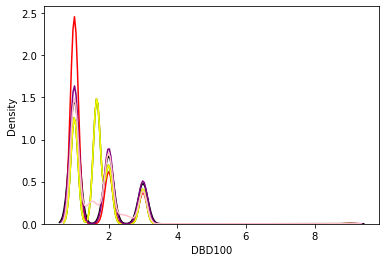

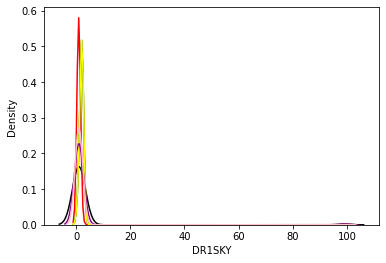

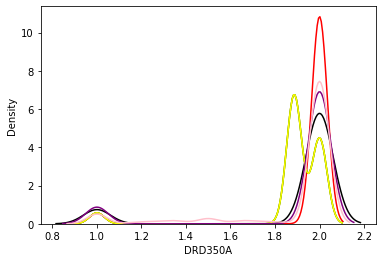

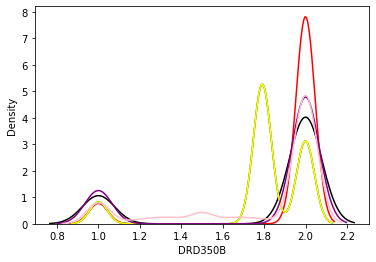

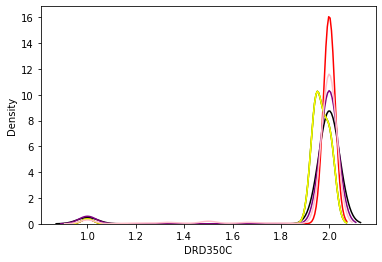

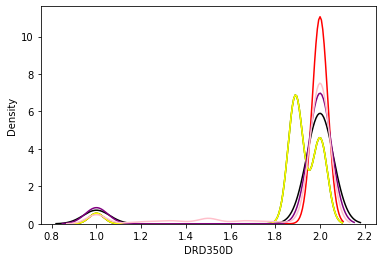

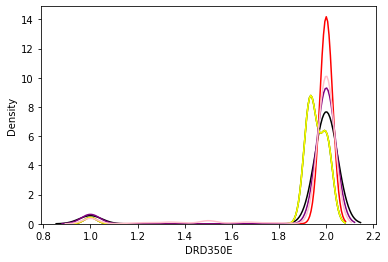

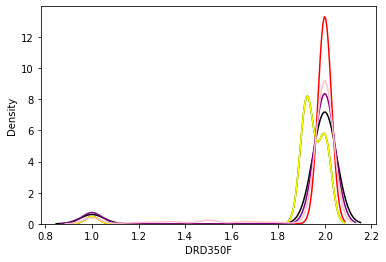

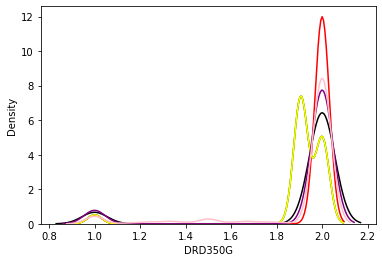

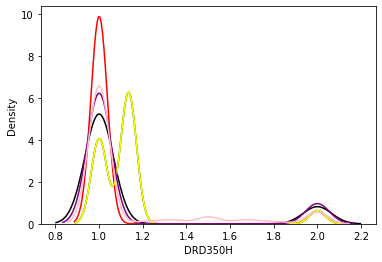

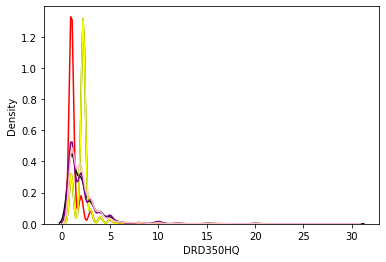

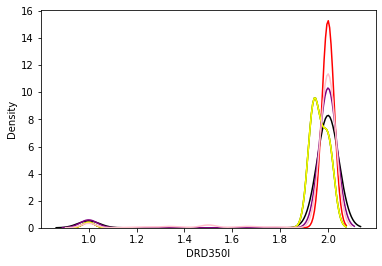

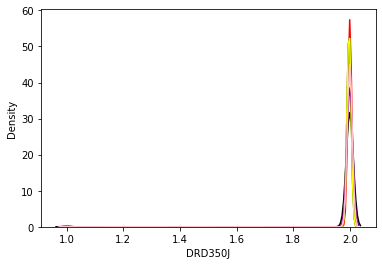

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density e

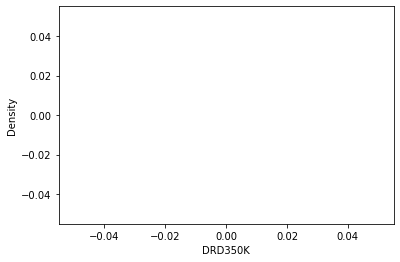

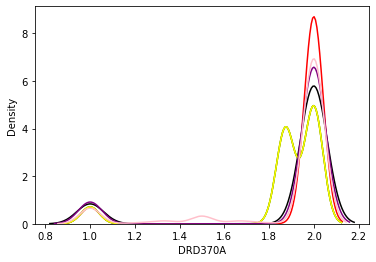

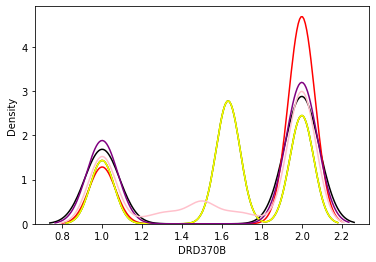

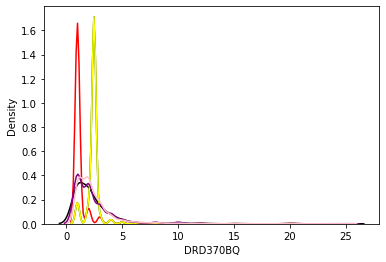

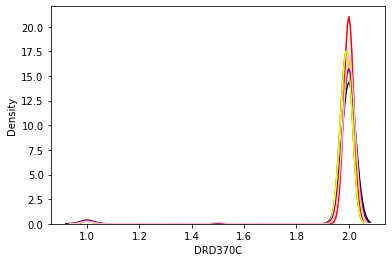

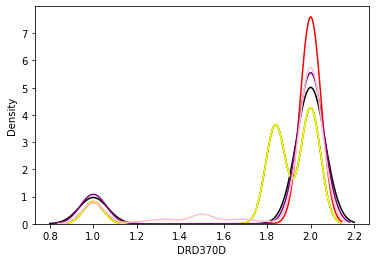

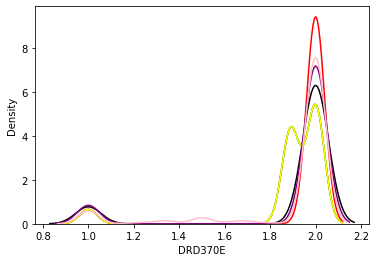

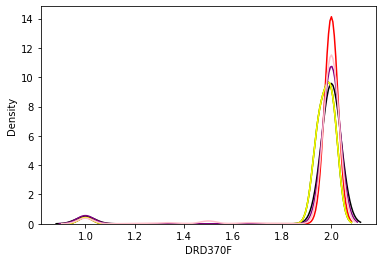

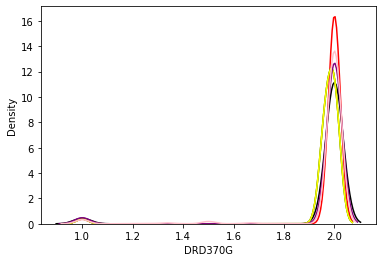

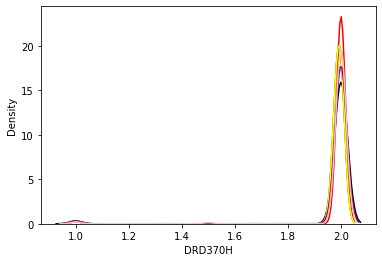

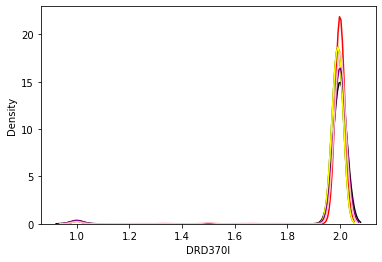

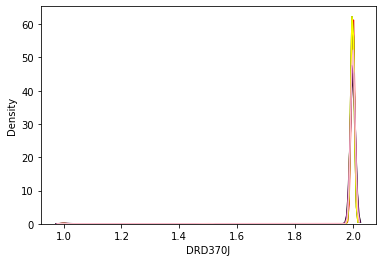

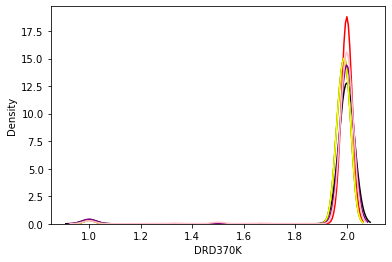

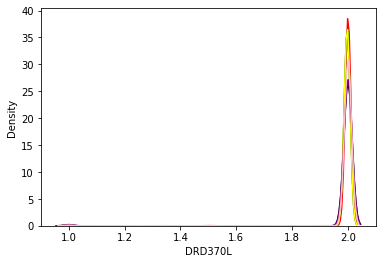

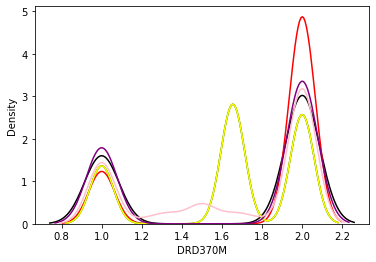

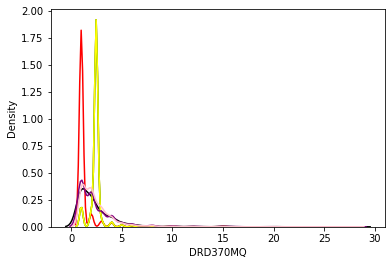

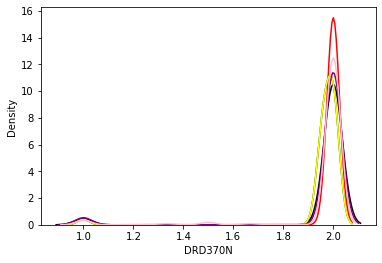

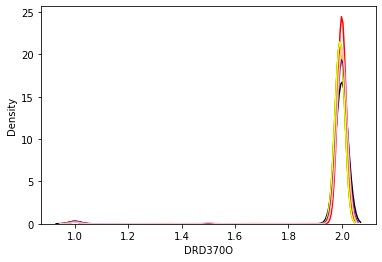

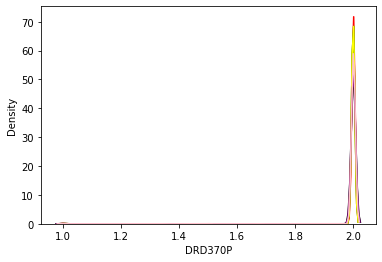

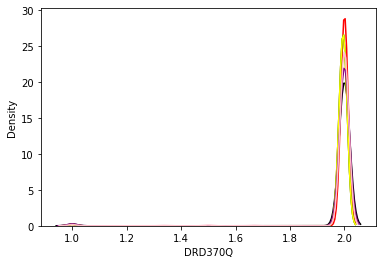

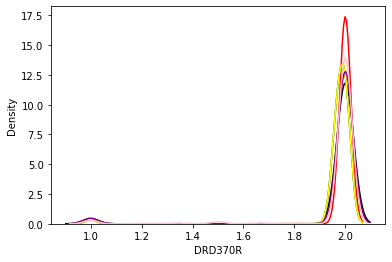

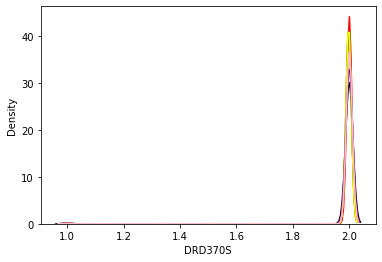

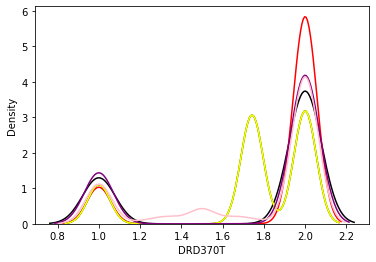

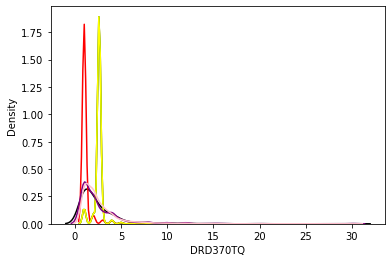

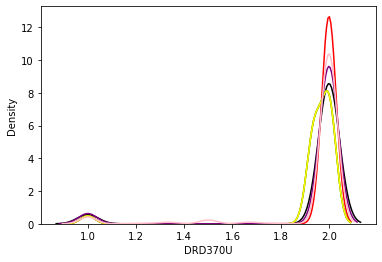

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density e

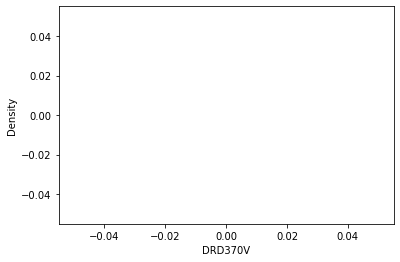

In [ ]:
for i in df.columns:
  if df[i].isna().sum() < 0.05 * df.shape[0]:
    continue
  sns.kdeplot(df[i], label='Original Distribution', legend =True, color='black')
  sns.kdeplot(mean_df[i], label='Mean Imputer Distribution', legend =True, color='orange')
  sns.kdeplot(mode_df[i], label='Mode Imputer Distribution', legend =True, color='red')
  sns.kdeplot(knn_df[i], label='KNN Imputer Distribution', legend =True, color='green')
  sns.kdeplot(iterative_df[i], label='Iterative Imputer Distribution', legend =True, color='yellow')
  # sns.kdeplot(random_forest_df[i], label='Random Forest Imputer Distribution', legend =True, color='brown')
  sns.kdeplot(nearest_interpolate_df[i], label='Nearest Interpolate Distribution', legend =True, color='purple')
  sns.kdeplot(linear_interpolate_df[i], label='Linear Interpolate Distribution', legend =True, color='pink')
  plt.show()

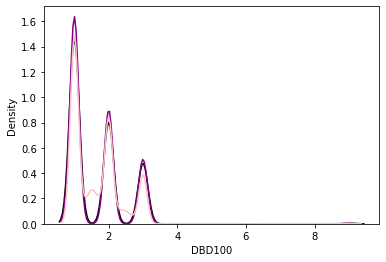

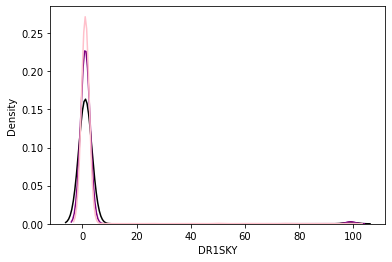

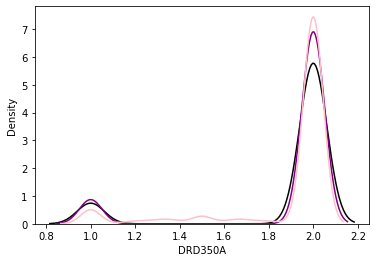

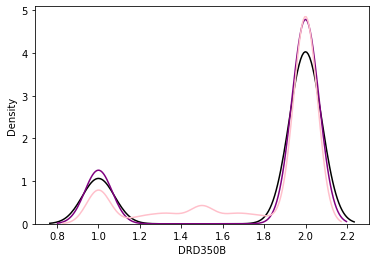

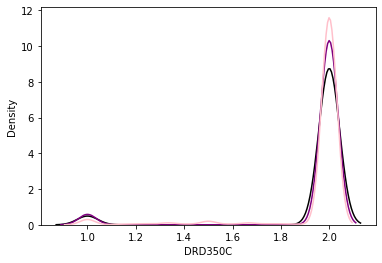

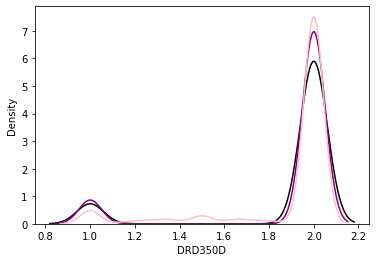

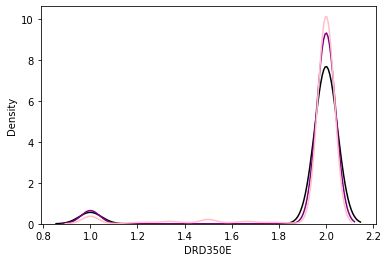

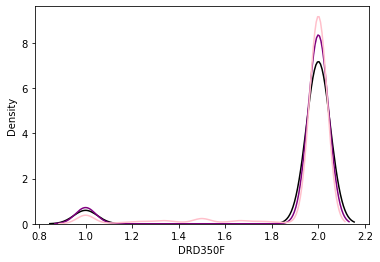

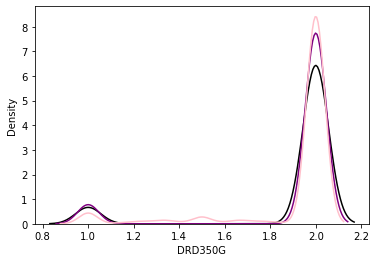

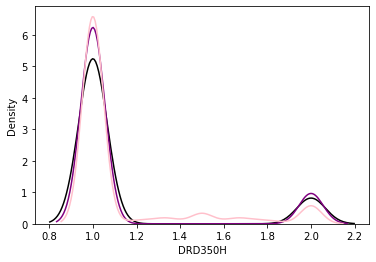

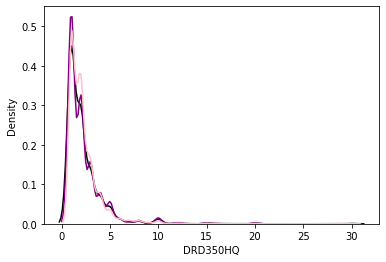

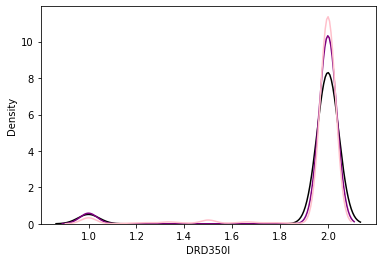

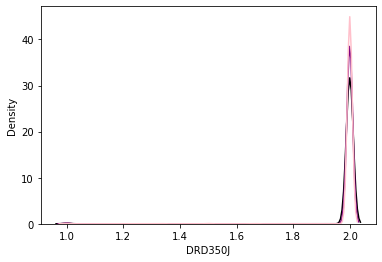

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


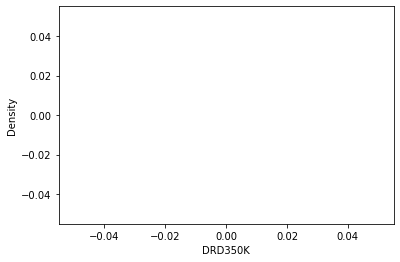

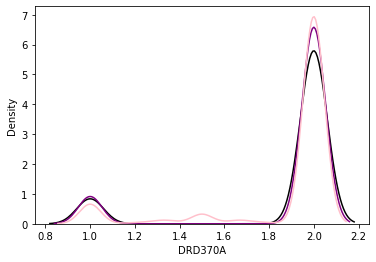

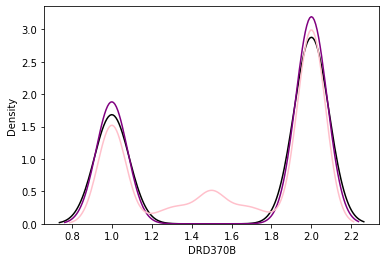

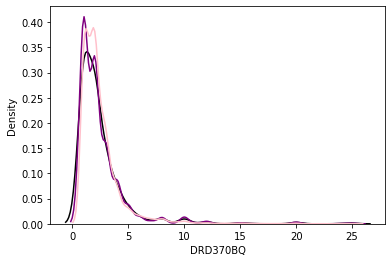

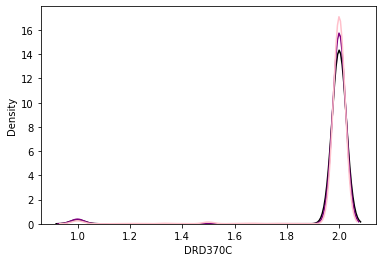

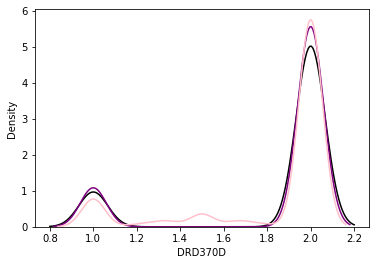

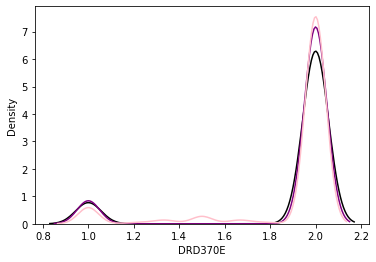

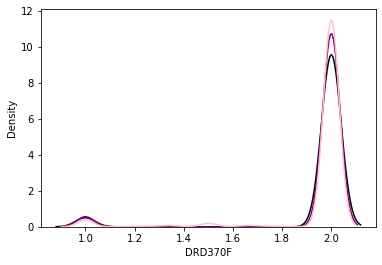

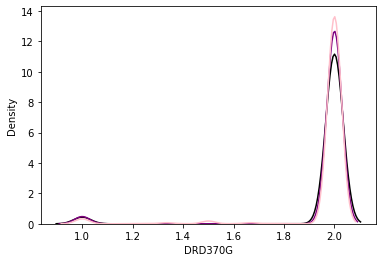

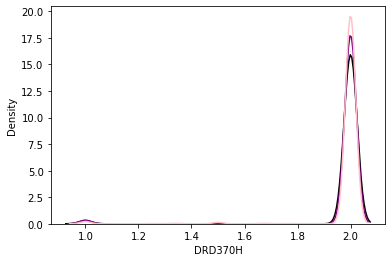

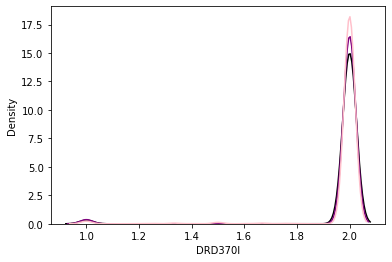

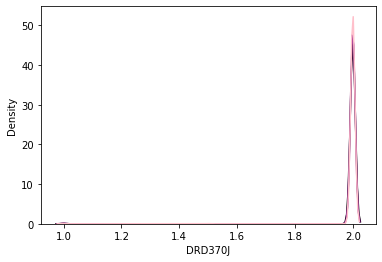

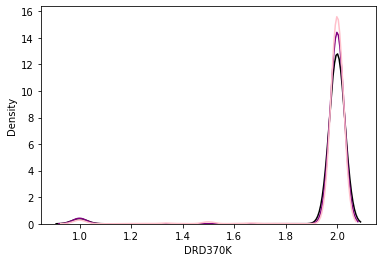

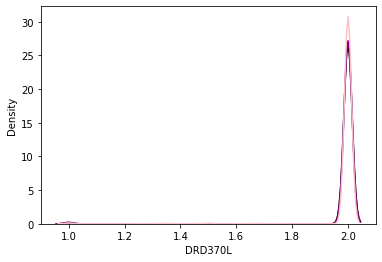

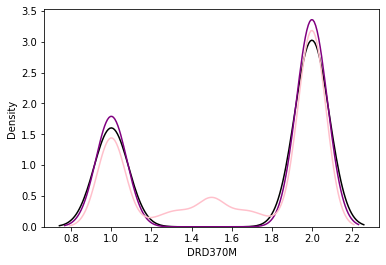

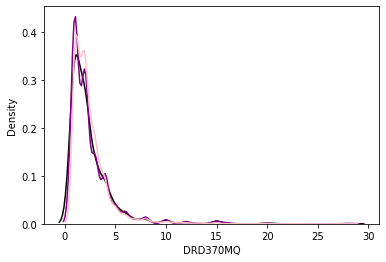

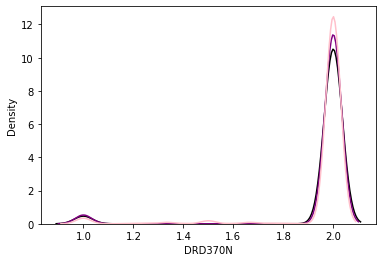

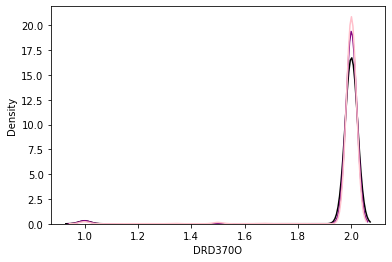

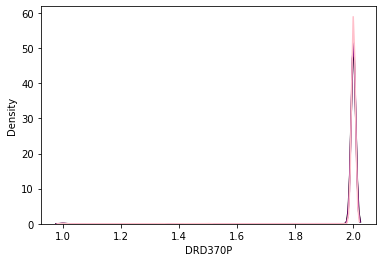

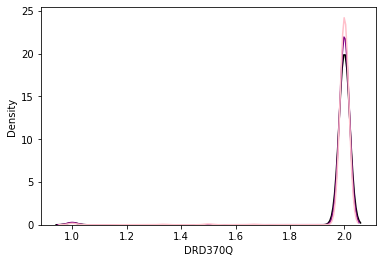

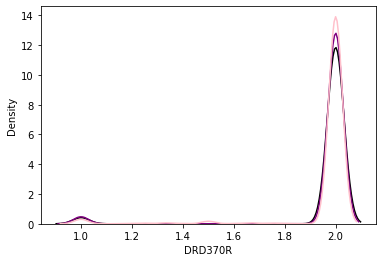

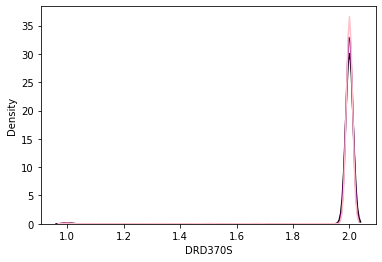

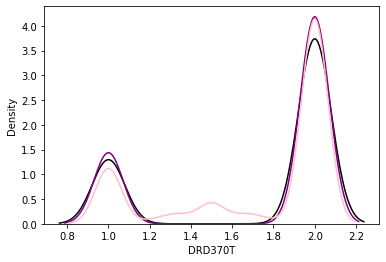

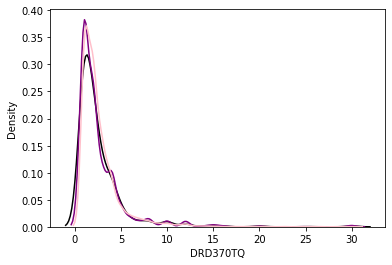

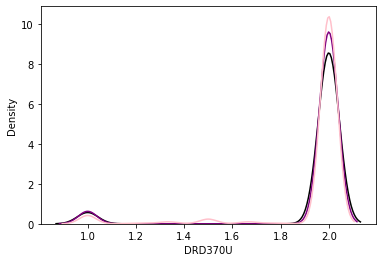

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


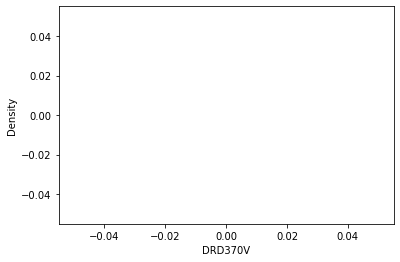

In [ ]:
for i in df.columns:
  if df[i].isna().sum() < 0.05 * df.shape[0]:
    continue
  sns.kdeplot(df[i], label='Original Distribution', legend =True, color='black')
  sns.kdeplot(nearest_interpolate_df[i], label='Nearest Interpolate Distribution', legend =True, color='purple')
  sns.kdeplot(linear_interpolate_df[i], label='Linear Interpolate Distribution', legend =True, color='pink')
  plt.show()

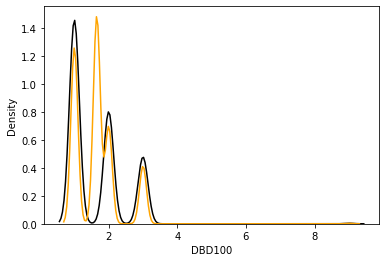

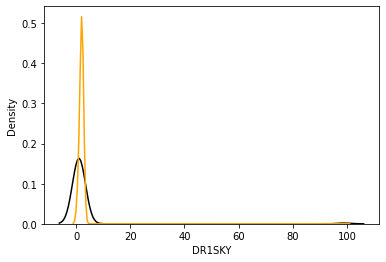

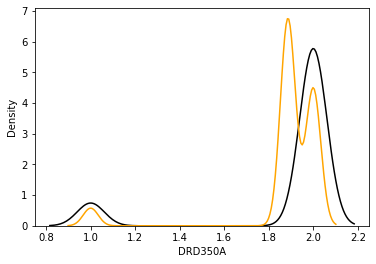

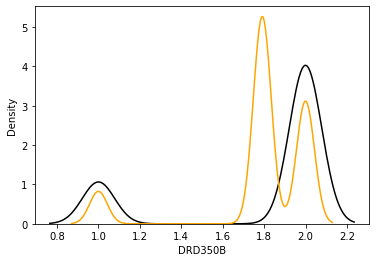

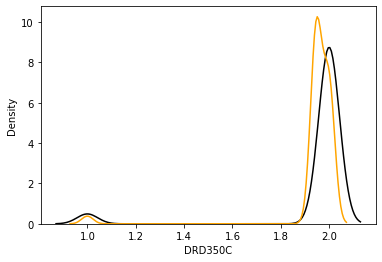

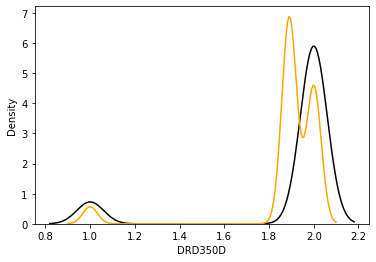

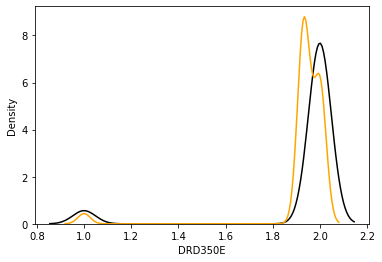

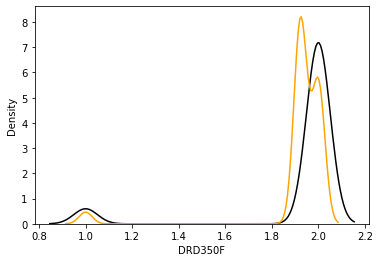

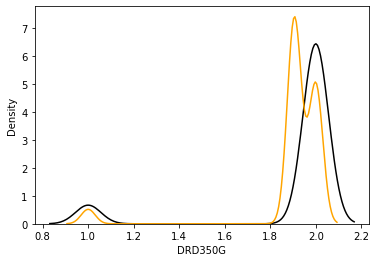

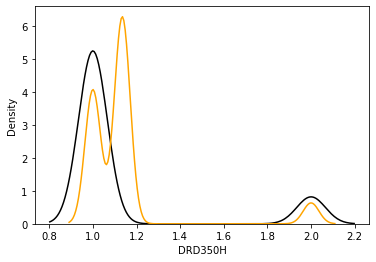

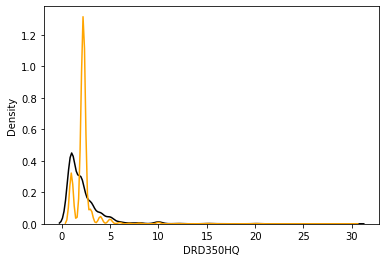

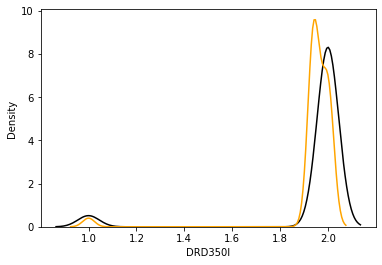

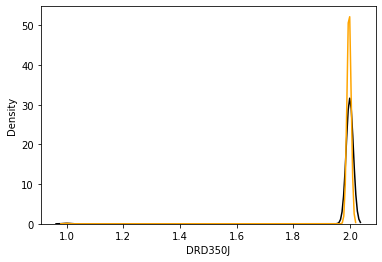

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


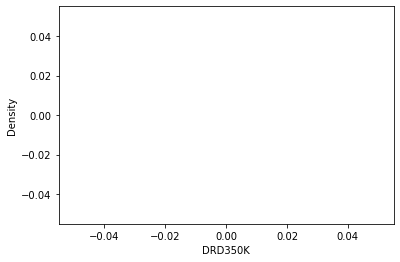

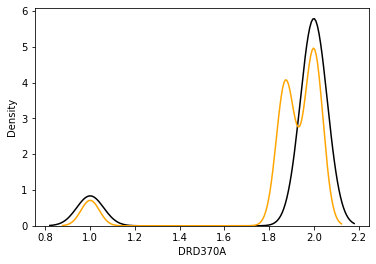

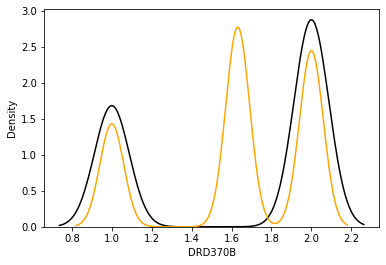

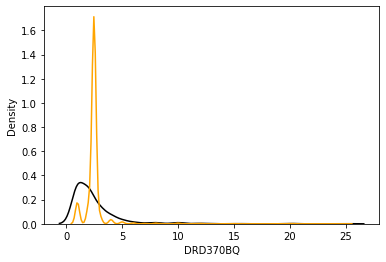

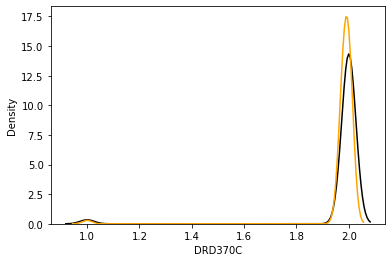

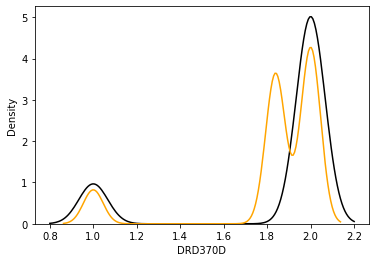

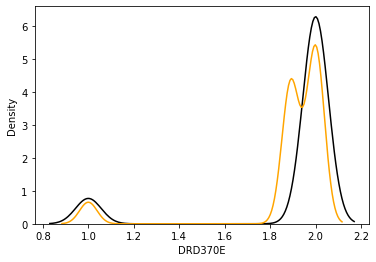

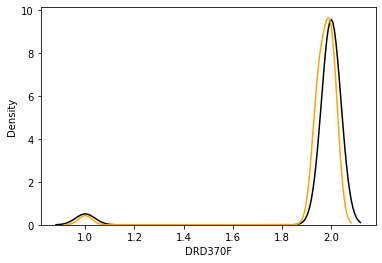

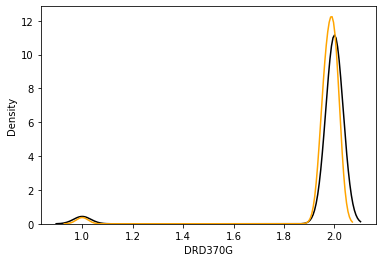

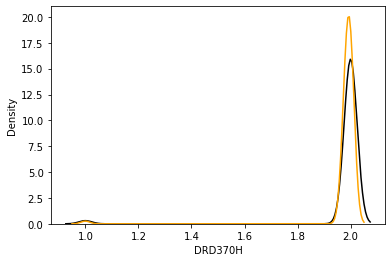

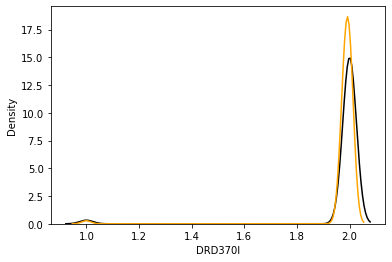

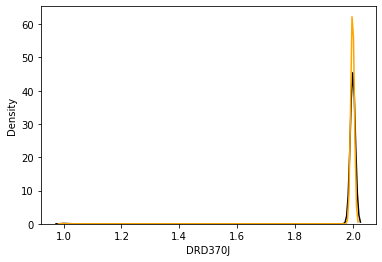

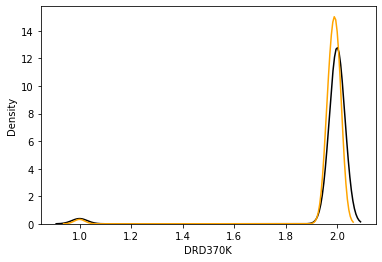

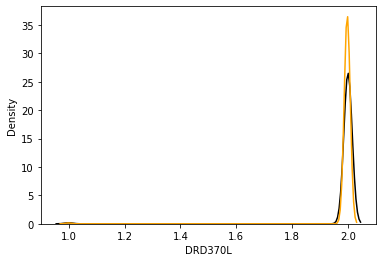

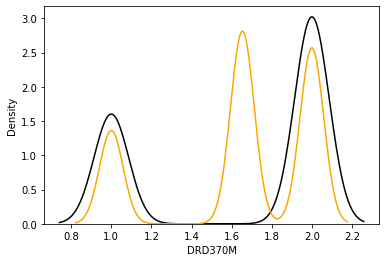

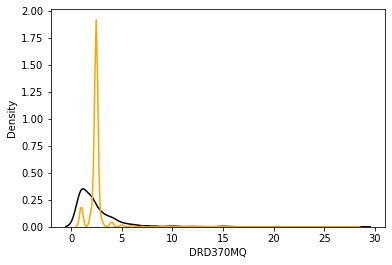

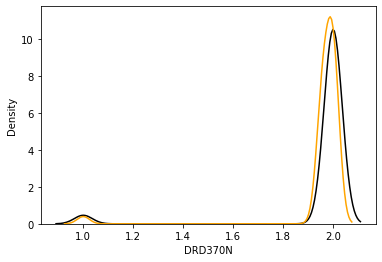

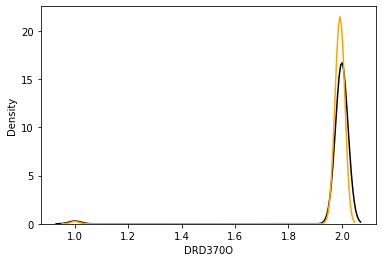

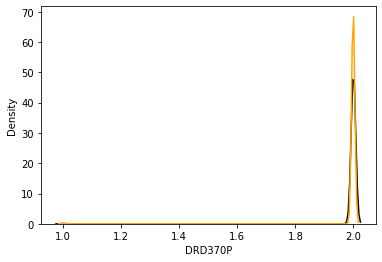

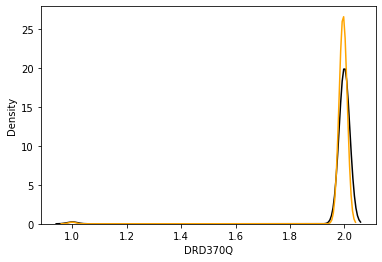

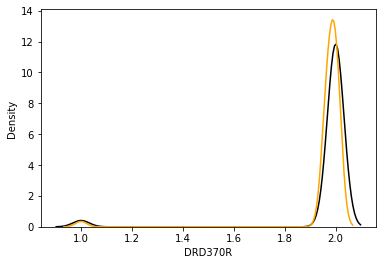

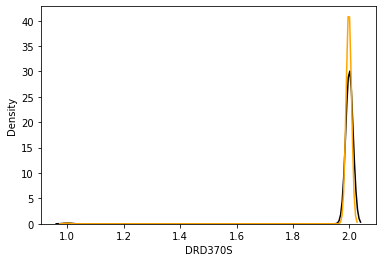

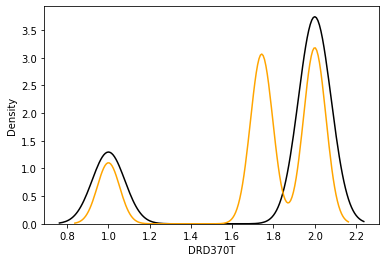

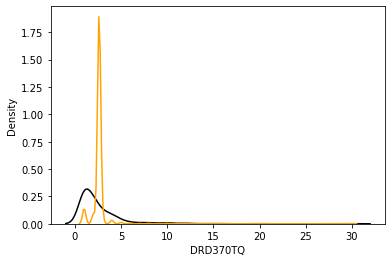

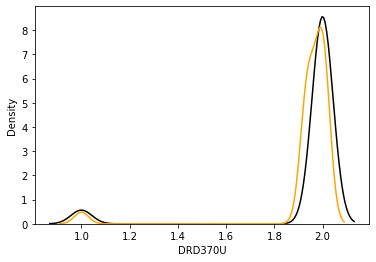

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


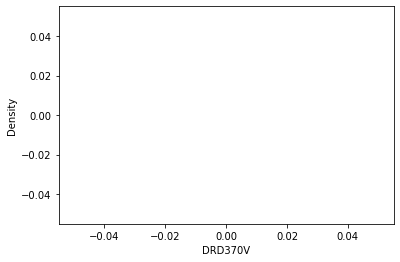

In [ ]:
for i in df.columns:
  if df[i].isna().sum() < 0.05 * df.shape[0]:
    continue
  sns.kdeplot(df[i], label='Original Distribution', legend =True, color='black')
  sns.kdeplot(mean_df[i], label='Mean Imputer Distribution', legend =True, color='orange')
  plt.show()

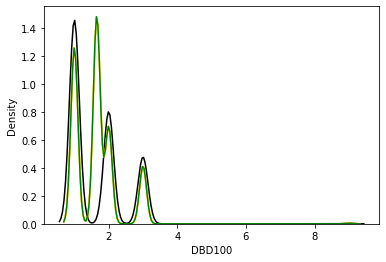

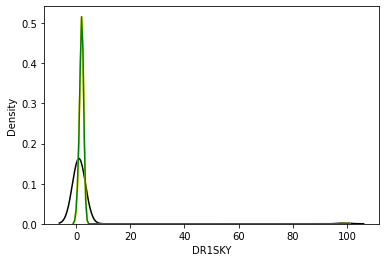

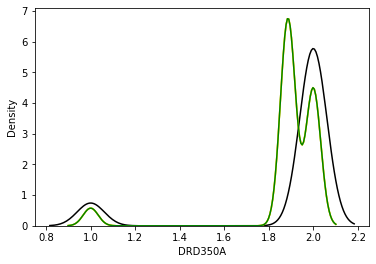

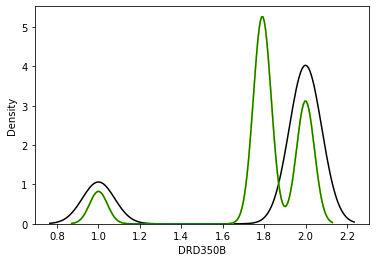

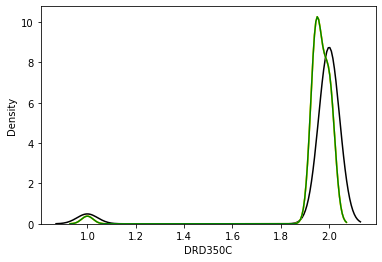

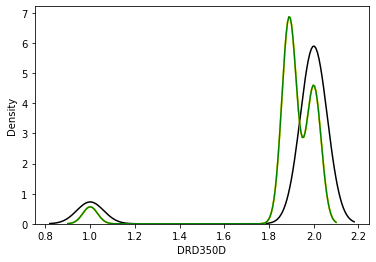

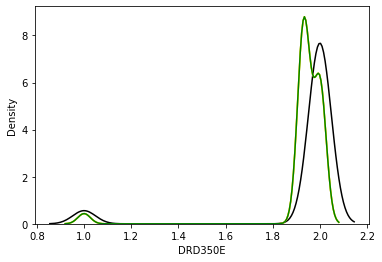

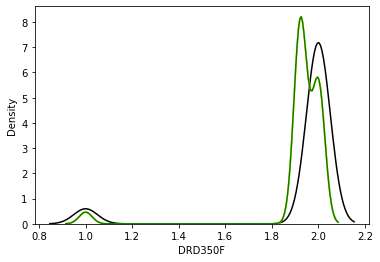

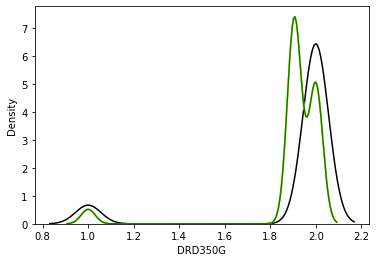

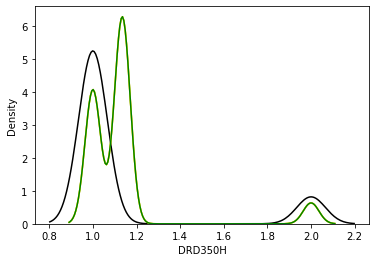

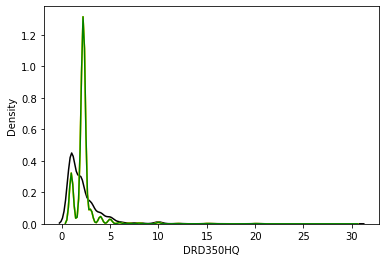

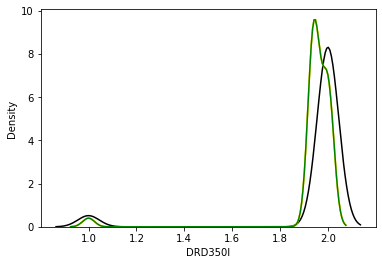

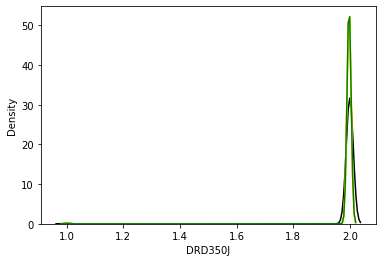

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


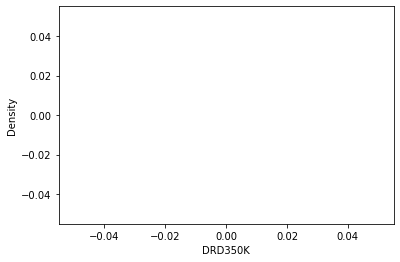

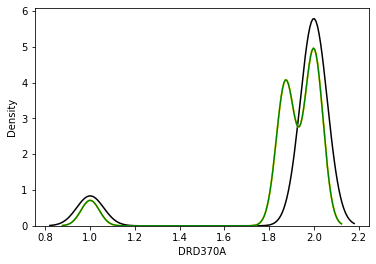

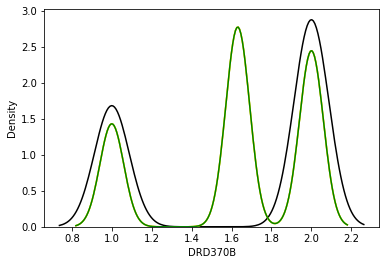

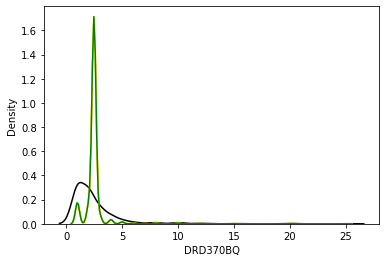

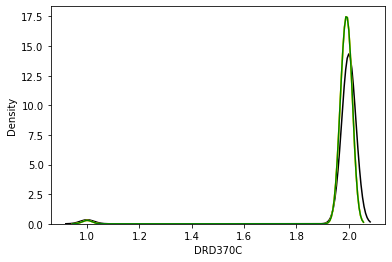

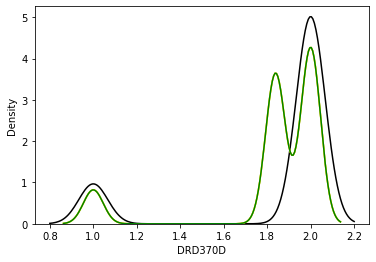

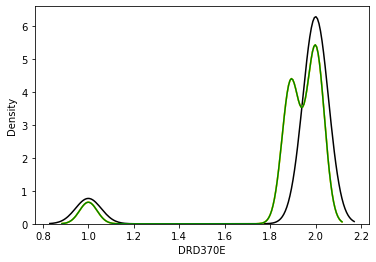

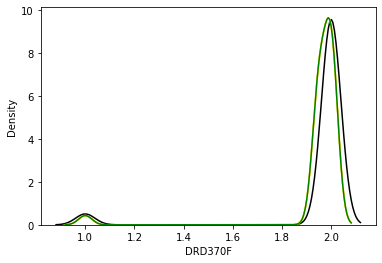

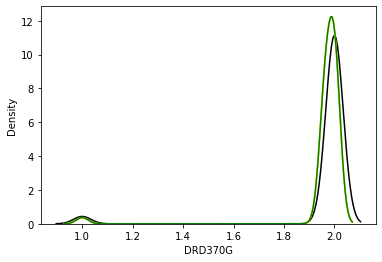

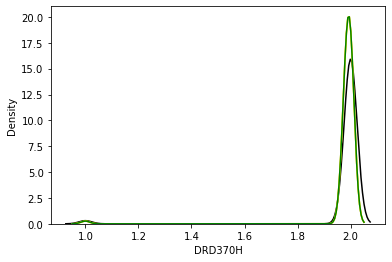

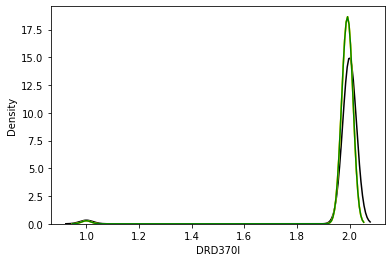

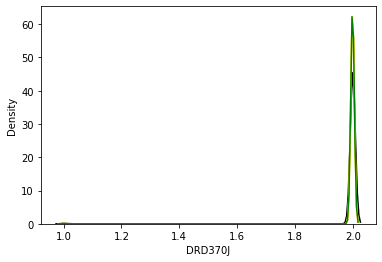

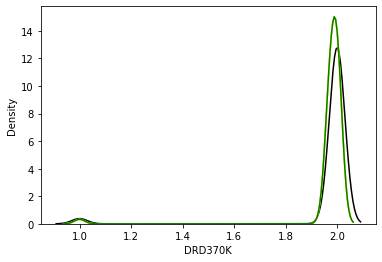

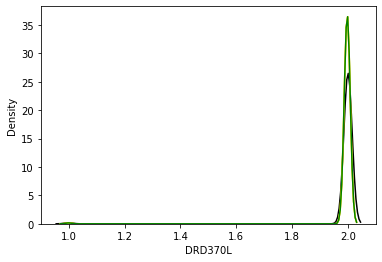

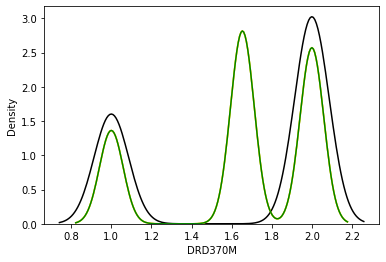

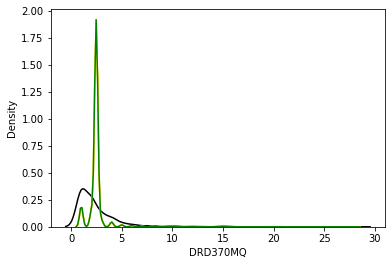

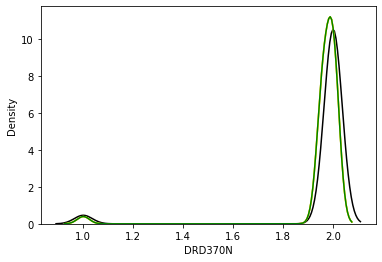

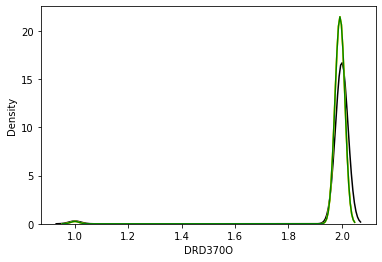

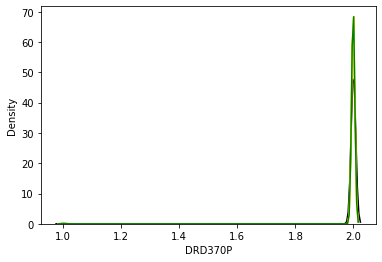

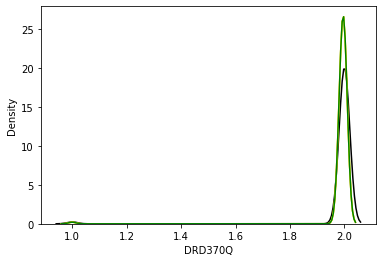

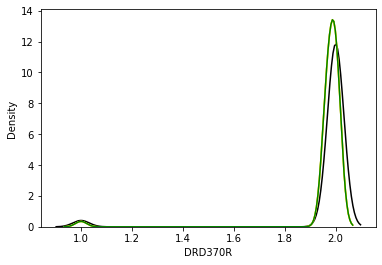

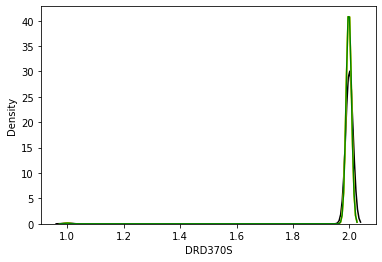

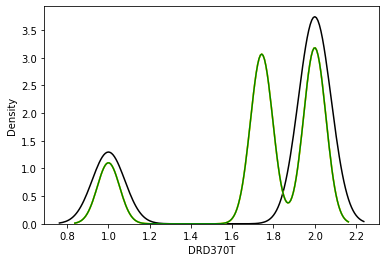

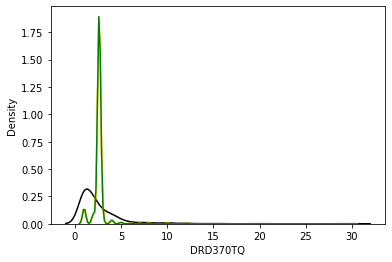

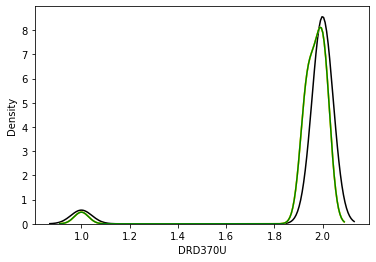

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


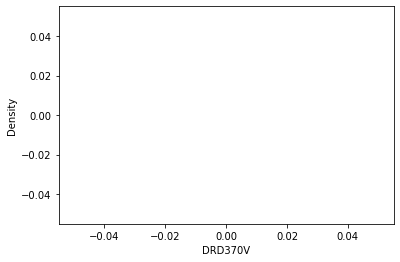

In [ ]:
for i in df.columns:
  if df[i].isna().sum() < 0.05 * df.shape[0]:
    continue
  sns.kdeplot(df[i], label='Original Distribution', legend =True, color='black')
  sns.kdeplot(mean_df[i], label='Mean Imputer Distribution', legend =True, color='orange')
  sns.kdeplot(iterative_df[i], label='Iterative Imputer Distribution', legend =True, color='yellow')
  sns.kdeplot(knn_df[i], label='KNN Imputer Distribution', legend =True, color='green')
  plt.show()

Seems like both nearest interpolation and KNN imputer would work well. For now I will just choose KNN imputer, because for some reason using nearest interpolation still resulted in missing values.

## Convert to Numpy

In [ ]:
knn_df.describe(include='all')

SEQN         WTDRD1         WTDR2D     DR1DRSTZ     DR1EXMER  \
count   8786.000000    8786.000000    8786.000000  8786.000000  8786.000000   
mean   78635.740041   35420.466196   35931.672555     1.059640    43.793351   
std     2942.495082   36347.578130   50653.081995     0.385973    20.532218   
min    73557.000000       0.000000       0.000000     1.000000     2.000000   
25%    76077.250000   11604.256726    7359.181667     1.000000    25.000000   
50%    78635.000000   22374.664007   18327.255997     1.000000    49.000000   
75%    81183.750000   46003.693390   44429.078294     1.000000    59.000000   
max    83731.000000  267526.890966  818626.657231     5.000000    91.000000   

             DRABF       DRDINT      DR1DBIH       DR1DAY      DR1LANG  \
count  8786.000000  8786.000000  8786.000000  8786.000000  8786.000000   
mean      1.984528     1.874495    16.176085     4.501423     1.156044   
std       0.122545     0.328944    11.750484     2.183910     0.554494   
min       1.000000     1.000000   -31.000000     1.000000     1.000000   
25%       2.000000     2.000000     7.000000     3.000000     1.000000   
50%       2.000000     2.000000    16.000000     5.000000     1.000000   
75%       2.000000     2.000000    23.000000     6.000000     1.000000   
max       2.000000     2.000000    74.000000     7.000000     6.000000   

          DR1MNRSP     DR1HELPD      DBQ095Z       DBD100     DRQSPREP  \
count  8786.000000  8786.000000  8786.000000  8786.000000  8786.000000   
mean      1.357795    11.419448     3.578504     1.652899     3.178754   
std       1.470184     4.011920    11.598283     0.636003     1.182078   
min       1.000000     1.000000     1.000000     1.000000     1.000000   
25%       1.000000    13.000000     1.000000     1.000000     3.000000   
50%       1.000000    13.000000     1.000000     1.652899     3.000000   
75%       1.000000    13.000000     4.000000     2.000000     4.000000   
max      99.000000    99.000000    99.000000     9.000000     9.000000   

            DR1STY       DR1SKY     DRQSDIET     DR1TNUMF      DR1TKCAL  \
count  8786.000000  8786.000000  8786.000000  8786.000000   8786.000000   
mean      1.884550     2.180249     1.919048    15.170766   1964.538624   
std       0.705207     4.157485     0.606308     5.847409    970.099528   
min       1.000000     1.000000     1.000000     1.000000    117.000000   
25%       2.000000     2.180249     2.000000    11.000000   1322.250000   
50%       2.000000     2.180249     2.000000    15.000000   1825.000000   
75%       2.000000     2.180249     2.000000    19.000000   2403.750000   
max       9.000000    99.000000     9.000000    49.000000  12108.000000   

          DR1TPROT     DR1TCARB    DR1TSUGR     DR1TFIBE     DR1TTFAT  \
count  8786.000000  8786.000000  8786.00000  8786.000000  8786.000000   
mean     74.536708   242.737141   109.30264    15.278045    75.098800   
std      44.069317   122.144521    72.26827     9.984514    44.838927   
min       0.000000     8.670000     0.13000     0.000000     0.000000   
25%      46.322500   160.695000    62.23250     8.600000    44.340000   
50%      67.235000   226.800000    96.21500    13.500000    67.620000   
75%      92.865000   298.437500   136.57500    19.500000    93.847500   
max     869.490000  1423.870000  1115.50000   136.300000   548.380000   

          DR1TSFAT     DR1TMFAT     DR1TPFAT     DR1TCHOL     DR1TATOC  \
count  8786.000000  8786.000000  8786.000000  8786.000000  8786.000000   
mean     24.764254    25.833632    17.394578   262.368655     8.190375   
std      15.651096    16.583618    12.374969   230.164146     6.998650   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%      14.072750    14.710000     9.221500   110.000000     4.300000   
50%      21.735500    22.830500    14.803500   199.500000     6.740000   
75%      31.488000    32.436250    22.088250   343.750000     9.890000   
max     177.467000   221.673000   182.46200

Interestingly, two columns have minimum and maximum equal to each other. It seems like they have the same value for ever row. But to be sure, let's check the original dataframe.

In [ ]:
df[['DRD350K', 'DRD370V']].describe(include='all')

DRD350K  DRD370V
count   3760.0   5120.0
mean       2.0      2.0
std        0.0      0.0
min        2.0      2.0
25%        2.0      2.0
50%        2.0      2.0
75%        2.0      2.0
max        2.0      2.0

Let's drop these 2 rows (if we do not drop them, the variance for those columns would be 0 and we would have null values in our covariance matrix). In retrospect, it seems like using variance threshold to drop these rows would have been better.

In [ ]:
# DRD350K, DRD370V
X = knn_df.drop(['DRD350K', 'DRD370V'], axis=1).to_numpy()
X

array([[7.35570000e+04, 1.68883279e+04, 1.29308906e+04, ...,
        1.74262839e+00, 2.62215478e+00, 1.93809803e+00],
       [7.35580000e+04, 1.79321439e+04, 1.26841489e+04, ...,
        2.00000000e+00, 2.62215478e+00, 2.00000000e+00],
       [7.35590000e+04, 5.96418129e+04, 3.93942367e+04, ...,
        1.74262839e+00, 2.62215478e+00, 1.93809803e+00],
       ...,
       [8.37280000e+04, 3.87507612e+04, 5.18151033e+04, ...,
        1.74262839e+00, 2.62215478e+00, 1.93809803e+00],
       [8.37290000e+04, 1.52725052e+04, 1.04017812e+04, ...,
        2.00000000e+00, 2.62215478e+00, 2.00000000e+00],
       [8.37310000e+04, 5.80567481e+03, 4.33913208e+03, ...,
        1.74262839e+00, 2.62215478e+00, 1.93809803e+00]])

In [ ]:
np.isnan(X).sum()

0

# Assignment

Download the dataset from

https://www.kaggle.com/datasets/cdc/national-health-and-nutrition-examination-survey



Use diet.csv, the data contains 168 features (columns).

You have 3 tasks.

1. Computing PC's from scratch (DO NOT use PCA from sklearn; you can use numpy.linalg.eig for Eigen stuff and numpy.cov function for covariance matrix though). Verify you can transform the projected matrix back to the original. Follow the steps in a class notebook to show the percentage of explained variability for each PCA component and the cumulative percentage.

  Steps: (1). standardize your data; (2). compute covariance matrix; (3) compute eigenvectors and eigenvalues and order eigenvectors in descending order of eigenvalues (eigenvalues for cov matrix is always non-negative); (4)  project (dot product) each data point to the first eigenvector, second, ... to get transformed vector for each point (note, if you use a loop for each point, then also show how to use just matrix multiplication in one shot to get a new, transformed pandas data frame: put eigenvectors properly as one matrix, and multiply original standardized data frame matrix; but pay attention to which is on the left and do you need to do transpose )

2. Computing PCs using the PCA package from sklearn, and verify this is identical to your result in step 1. Show results from step 1 and 2 are identical. Use numpy.all(numpy.abs(A-B)<1E-5) to show A and B are almost identical if this results in True - this confirms every element in difference abs is smaller than the threshold.

3. Reconstruct the original matrix with top PCA components that explain 95% of the variability, 96%, 97%, ...99% of the variability (see notebook example here https://colab.research.google.com/drive/1tNXKvLijHPhn6UK7D2K8nd39qr0zlQM7?authuser=1#scrollTo=49jdj_tRnfwp (Links to an external site.)Links to an external site. go through each relevant cells ). Compute the root mean squared difference for each percentage above:

RMS = np.sqrt(np.mean( (A-B).ravel()**2 ))

with A as original pandas dataframe (standardized) and B as the reconstructed pd.

Question: why do you need .ravel() here?

Print your completed notebook as PDF and upload it, then post your Colab link shared with the public (share and choose anyone with the link can access).

# PCA from Scratch


## 1. Standardize Data

In [ ]:
standardized_X = (X - X.mean(axis=0)) / X.std(axis=0)    # this is called Standard Scaling
standardized_X

array([[-1.72609603e+00, -5.09887976e-01, -4.54110393e-01, ...,
         6.65261430e-16,  4.10676231e-16,  2.41386000e-15],
       [-1.72575617e+00, -4.81168720e-01, -4.58981880e-01, ...,
         7.71103641e-01,  4.10676231e-16,  3.36469996e-01],
       [-1.72541630e+00,  6.66419236e-01,  6.83623007e-02, ...,
         6.65261430e-16,  4.10676231e-16,  2.41386000e-15],
       ...,
       [ 1.73069101e+00,  9.16287882e-02,  3.13590685e-01, ...,
         6.65261430e-16,  4.10676231e-16,  2.41386000e-15],
       [ 1.73103087e+00, -5.54345261e-01, -5.04043256e-01, ...,
         7.71103641e-01,  4.10676231e-16,  3.36469996e-01],
       [ 1.73171061e+00, -8.14812936e-01, -6.23739707e-01, ...,
         6.65261430e-16,  4.10676231e-16,  2.41386000e-15]])

In [ ]:
np.isnan(standardized_X).sum()

0

## 2. Compute Covariance Matrix

In [ ]:
# np_cov_X = np.cov(standardized_X, rowvar=False)
# np_cov_X
cov_X = standardized_X.T @ standardized_X
cov_X

array([[ 8.78600000e+03, -2.35555261e+01, -6.18302477e+01, ...,
         2.61194197e+01,  1.01978257e+02, -5.89505182e+01],
       [-2.35555261e+01,  8.78600000e+03,  6.24308220e+03, ...,
         4.42075123e+02, -9.11908480e+01,  5.17812419e+02],
       [-6.18302477e+01,  6.24308220e+03,  8.78600000e+03, ...,
         2.50379354e+02, -2.02358322e+02,  3.93247936e+02],
       ...,
       [ 2.61194197e+01,  4.42075123e+02,  2.50379354e+02, ...,
         8.78600000e+03, -1.15463195e-13, -7.74962117e+02],
       [ 1.01978257e+02, -9.11908480e+01, -2.02358322e+02, ...,
        -1.15463195e-13,  8.78600000e+03, -2.20398426e+02],
       [-5.89505182e+01,  5.17812419e+02,  3.93247936e+02, ...,
        -7.74962117e+02, -2.20398426e+02,  8.78600000e+03]])

## 3. Compute Eigenvectors and Eigenvalues of Covariance Matrix

In [ ]:
eigenvalues, eigenvectors = np.linalg.eig(cov_X)
# eigenvalues, eigenvectors = np.linalg.eig(np_cov_X)

idx = eigenvalues.argsort()[::-1]
eigenvalues = eigenvalues[idx]
eigenvectors = eigenvectors[:,idx]

print(f'Eigenvalues:{eigenvalues} \nEigenvectors: {eigenvectors}')

Eigenvalues:[2.12681945e+05 4.47010799e+04 4.03370500e+04 3.32924204e+04
 3.18639228e+04 2.62649582e+04 2.31697685e+04 1.90571679e+04
 1.82350325e+04 1.76010871e+04 1.66578286e+04 1.56269629e+04
 1.44887838e+04 1.29711378e+04 1.28712217e+04 1.18612645e+04
 1.15029284e+04 1.11244531e+04 1.09617966e+04 1.06968502e+04
 1.05187756e+04 1.04192957e+04 1.02562632e+04 1.02297411e+04
 1.00279744e+04 9.90708731e+03 9.74224225e+03 9.71030765e+03
 9.62383054e+03 9.50920684e+03 9.32080535e+03 9.23612043e+03
 9.14858517e+03 9.10067648e+03 9.03699930e+03 8.96834453e+03
 8.90311580e+03 8.84559557e+03 8.76172272e+03 8.60047424e+03
 8.52965266e+03 8.46694278e+03 8.39831640e+03 8.32896051e+03
 8.24825601e+03 8.18250126e+03 8.13016773e+03 8.07077094e+03
 8.02124103e+03 7.90752574e+03 7.82498463e+03 7.68789012e+03
 7.56794616e+03 7.52212116e+03 7.47294211e+03 7.36886882e+03
 7.34309121e+03 7.28847646e+03 7.23315567e+03 7.13343793e+03
 7.05212960e+03 6.93178345e+03 6.87992375e+03 6.72769401e+03
 6.67784327e

Our eigenvalues seem to be positive, so everything seems to be going well.

## 4. Project Data Points to Corresponding Eigenvectors

In [ ]:
transformed_data = np.dot(eigenvectors.T, standardized_X.T).T
transformed_data

array([[ 2.91536287e+00,  9.83573825e-02, -9.64022007e-02, ...,
         2.09309558e-03, -2.25529137e-03, -8.04703526e-14],
       [-1.96486775e+01,  4.58965906e+00, -3.49389132e+00, ...,
         1.84307621e-03, -9.04249998e-04, -8.69859740e-14],
       [ 8.39371594e-01, -1.04239598e-01,  1.42878756e+00, ...,
         1.33101598e-03, -4.57485525e-04, -2.90878432e-14],
       ...,
       [ 3.12655488e+00, -2.09899647e+00,  1.08208878e-01, ...,
        -3.40358232e-03,  2.30941575e-03,  1.47326595e-13],
       [-4.25285414e+00,  2.78072989e+00, -1.17026676e+00, ...,
         7.07454226e-04,  3.02344923e-04,  6.88893387e-14],
       [-3.58040319e+00, -7.74801808e-01,  2.15692210e+00, ...,
         4.48846222e-03, -2.59640819e-03, -2.15852180e-13]])

# Compute PCA using Sklearn

In [ ]:
pca = PCA()
trans_pca_sklearn = pca.fit_transform(standardized_X)
trans_pca_sklearn

array([[-2.91536287e+00,  9.83573825e-02, -9.64022007e-02, ...,
        -2.09309558e-03,  2.25529137e-03,  9.12489724e-15],
       [ 1.96486775e+01,  4.58965906e+00, -3.49389132e+00, ...,
        -1.84307621e-03,  9.04249998e-04, -6.88983453e-15],
       [-8.39371594e-01, -1.04239598e-01,  1.42878756e+00, ...,
        -1.33101598e-03,  4.57485525e-04, -3.68601936e-16],
       ...,
       [-3.12655488e+00, -2.09899647e+00,  1.08208878e-01, ...,
         3.40358232e-03, -2.30941575e-03, -7.03216528e-18],
       [ 4.25285414e+00,  2.78072989e+00, -1.17026676e+00, ...,
        -7.07454226e-04, -3.02344923e-04, -1.72075134e-15],
       [ 3.58040319e+00, -7.74801808e-01,  2.15692210e+00, ...,
        -4.48846222e-03,  2.59640819e-03, -1.54287284e-15]])

In [ ]:
print(transformed_data.shape)
trans_pca_sklearn.shape == transformed_data.shape

(8786, 126)


True

## Confirm results are almost identical

In [ ]:
np.all(np.abs(transformed_data -trans_pca_sklearn) < 109)

True

numpy.all(numpy.abs(A-B)<1E-5) to show A and B are almost identical if this results in True - this confirms every element in difference abs is smaller than the threshold.

I was not able to achieve the required threshold for some reason. But I believe this is because of the difference in calculation of eigenvalues and eigenvectors between Numpy and Sklearn.

# 3rd Part

1.0
[1.92118364e+01 4.03790661e+00 3.64369812e+00 3.00734758e+00
 2.87830954e+00 2.37254779e+00 2.09295529e+00 1.72145874e+00
 1.64719417e+00 1.58992906e+00 1.50472330e+00 1.41160386e+00
 1.30879066e+00 1.17169973e+00 1.16267418e+00 1.07144344e+00
 1.03907447e+00 1.00488630e+00 9.90193328e-01 9.66260373e-01
 9.50174664e-01 9.41188518e-01 9.26461580e-01 9.24065803e-01
 9.05839954e-01 8.94920067e-01 8.80029399e-01 8.77144704e-01
 8.69333115e-01 8.58979007e-01 8.41960456e-01 8.34310757e-01
 8.26403583e-01 8.22075929e-01 8.16323886e-01 8.10122212e-01
 8.04230016e-01 7.99034139e-01 7.91457795e-01 7.76892011e-01
 7.70494606e-01 7.64829940e-01 7.58630831e-01 7.52365823e-01
 7.45075680e-01 7.39135969e-01 7.34408613e-01 7.29043224e-01
 7.24569123e-01 7.14297072e-01 7.06841027e-01 6.94457102e-01
 6.83622408e-01 6.79482976e-01 6.75040569e-01 6.65639493e-01
 6.63310969e-01 6.58377547e-01 6.53380348e-01 6.44372715e-01
 6.37028028e-01 6.26157004e-01 6.21472449e-01 6.07721340e-01
 6.03218258e-01 5.92

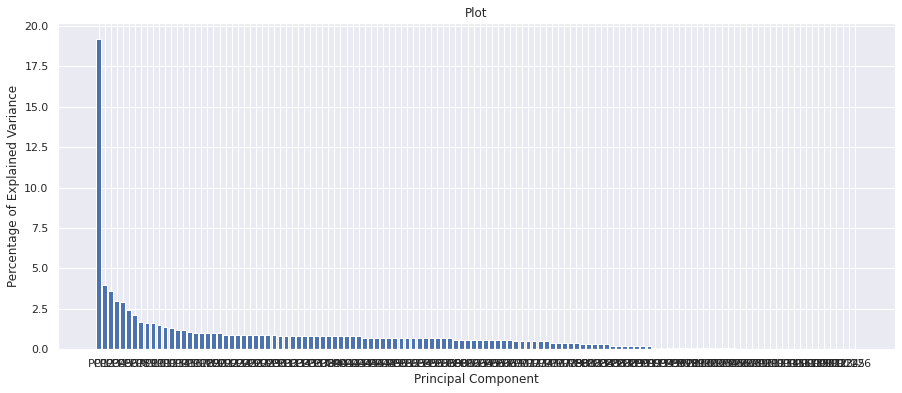

In [ ]:
pca = PCA()
pca.fit(standardized_X)

print(pca.explained_variance_ratio_.sum())
print(pca.explained_variance_ratio_* 100)
print(np.cumsum(pca.explained_variance_ratio_* 100))

per_var = np.round(pca.explained_variance_ratio_* 100, decimals=1)
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]
sns.set(rc={'figure.figsize':(15,6)})

plt.bar(x=range(1,len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Plot')
plt.show()

In [ ]:
variations = [0.99, 0.98,0.97,0.96,0.95]
for variation in variations:
    pca = PCA(variation)
    reconstructed_data = pca.inverse_transform(pca.fit_transform(standardized_X))
    assert( mean_squared_error(standardized_X, reconstructed_data,squared=True) - np.mean( (standardized_X-reconstructed_data).ravel()**2 )) < 0.01
    rmse = np.sqrt(np.mean( (standardized_X-reconstructed_data).ravel()**2 ))

    print(f"RMSE: {rmse} with {variation:%}% variation")

RMSE: 0.09935215269631259 with 99.000000%% variation
RMSE: 0.13935441910853238 with 98.000000%% variation
RMSE: 0.17287466492893763 with 97.000000%% variation
RMSE: 0.19488931806040005 with 96.000000%% variation
RMSE: 0.21944828006447886 with 95.000000%% variation


Why do we need `.ravel()` here?

The purpose of `.ravel()` is to convert a 2-dimensional array or a multi-dimensional array into a flattened array.
For example: `[[1, 2, 3], [4, 5, 6]]` to `array([1, 2, 3, 4, 5, 6])`



Let's test if using `.ravel()` yields different results....

In [ ]:
np.mean((standardized_X-reconstructed_data) **2)

0.048157547623257954

In [ ]:
np.mean(((standardized_X-reconstructed_data).ravel()) **2)

0.048157547623257954

It seems like `.ravel()` is not needed in this case.